In [32]:
# ============================================================
# INSTALL REQUIRED LIBRARIES
# ============================================================
# %pip is a magic command in Jupyter notebooks that installs Python packages
# We need numpy for numerical operations and matplotlib for plotting

# %pip install numpy matplotlib

# numpy: Provides powerful array operations and mathematical functions
# matplotlib: Allows us to create plots and visualizations

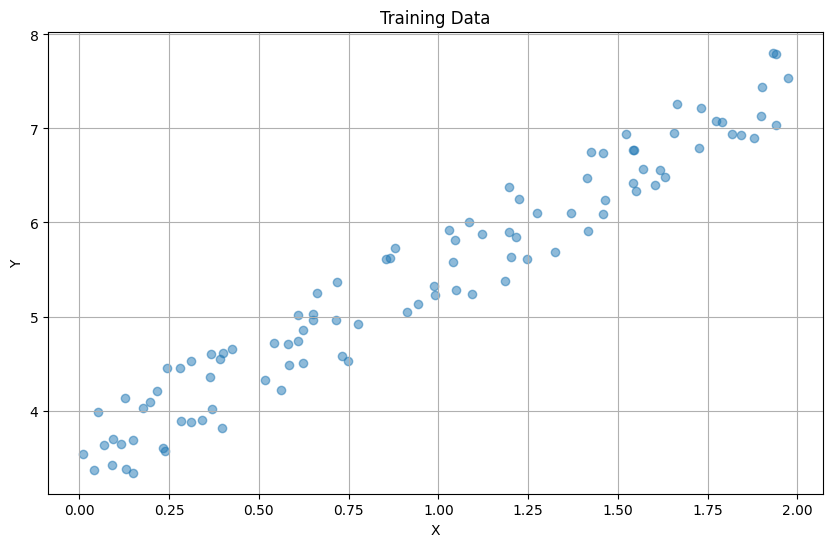

Data shape: x:(100, 1), y:(100, 1)
First 5 examples:
x: [0.74908024 1.90142861 1.46398788 1.19731697 0.31203728]
y: [4.52958966 7.43926764 6.24233175 5.90320463 4.53164104]


In [33]:
# ============================================================
# DATA GENERATION AND VISUALIZATION
# ============================================================
# Import necessary libraries
import numpy as np  # For numerical operations and arrays
import matplotlib.pyplot as plt  # For plotting and visualization

# Set random seed for reproducibility
# This ensures we get the same "random" numbers every time we run the code
# Making it easier to debug and compare results
np.random.seed(42)  # 42 is a common choice (Hitchhiker's Guide reference!)

# ============================================================
# Generate Synthetic Training Data
# ============================================================
# We're creating fake data that follows: y = 3 + 2x + noise
# This lets us know the "true" answer and test if our algorithm finds it

m = 100  # Number of training examples (data points)
         # More examples = better learning, but slower computation

# Generate random x values uniformly distributed between 0 and 2
x = 2 * np.random.rand(m, 1)  # np.random.rand(m, 1) gives values in [0, 1)
                               # Multiplying by 2 scales it to [0, 2)
                               # Shape: (100, 1) - 100 rows, 1 column (feature)

# Generate y values following the relationship: y = 3 + 2x + noise
y = 3 + 2*x + np.random.rand(m, 1)  # 3 is the intercept (θ₀)
                                     # 2 is the slope (θ₁)
                                     # np.random.rand adds random noise [0, 1)
                                     # Noise makes it more realistic (real data isn't perfect)
                                     # Shape: (100, 1)

# ============================================================
# Visualize the Data
# ============================================================
plt.figure(figsize=(10, 6))  # Create a new figure, 10 inches wide, 6 inches tall

# Create a scatter plot of our data points
plt.scatter(x, y, alpha=0.5)  # x on horizontal axis, y on vertical axis
                              # alpha=0.5 makes points 50% transparent
                              # Helps see overlapping points

# Add labels and formatting to make the plot readable
plt.xlabel('X')  # Label for horizontal axis
plt.ylabel('Y')  # Label for vertical axis
plt.title('Training Data')  # Title at the top of the plot
plt.grid(True)  # Add gridlines to help read values
plt.show()  # Display the plot (renders it to screen)

# ============================================================
# Print Data Information
# ============================================================
# Print the shape (dimensions) of our data
print(f"Data shape: x:{x.shape}, y:{y.shape}")  # Should show (100, 1) for both

# Print first 5 examples to see what the data looks like
print(f"First 5 examples:")
print(f"x: {x[:5].flatten()}")  # x[:5] gets first 5 rows
                                # .flatten() converts from (5, 1) to (5,) for nicer display
print(f"y: {y[:5].flatten()}")  # Same for y values

In [34]:
# Implementing the analytical solution using the Normal Equation
# Normal Equation: θ = (XᵀX)⁻¹Xᵀy
# This gives us the optimal parameters directly without iteration

# Step 1: Add bias term (intercept) to our feature matrix
# We need to add a column of ones to represent θ₀ (the intercept/bias term)
# Original x shape: (100, 1) - just one feature
# After adding bias: (100, 2) - first column is all 1s, second column is our x values
# This allows our model to be: y = θ₀·1 + θ₁·x (where θ₀ is the y-intercept)

# Breaking down: x_b = np.c_[np.ones((m, 1)), x]
#
# np.ones((m, 1))  -> Creates a (100, 1) column vector filled with 1s
#                     [[1], [1], [1], ..., [1]]
#
# x                -> Our existing feature data, shape (100, 1)
#                     [[x₁], [x₂], [x₃], ..., [x₁₀₀]]
#
# np.c_[..., ...]  -> Column concatenation - sticks arrays side-by-side as columns
#                     Think of it like: [ones_column | x_column]
#
# Result: x_b      -> Shape (100, 2) matrix that looks like:
#                     [[1, x₁  ],
#                      [1, x₂  ],
#                      [1, x₃  ],
#                      ...
#                      [1, x₁₀₀]]
#
# Why add ones? When we multiply x_b by θ = [θ₀, θ₁]:
# [1, x] · [θ₀, θ₁] = 1·θ₀ + x·θ₁ = θ₀ + θ₁·x  (which is y = b + mx!)
x_b = np.c_[np.ones((m, 1)), x]

print(f"x_b shape: {x_b.shape}")  # Should be (100, 2)
print(f"first 3 rows of x_b:\n{x_b[:3]}")  # First column is 1s, second is x values

# Step 2: Apply the Normal Equation to find optimal θ
# Formula breakdown: θ = (XᵀX)⁻¹Xᵀy
#
# x_b.T @ x_b         -> XᵀX: (2, 100) @ (100, 2) = (2, 2) matrix
# np.linalg.inv(...)  -> (XᵀX)⁻¹: inverse of the (2, 2) matrix
# x_b.T @ y           -> Xᵀy: (2, 100) @ (100, 1) = (2, 1) vector
# Final result        -> θ: (2, 1) vector containing [θ₀, θ₁]
theta_best = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y

# Display the results
print("\n" + "="*50)
print("Optimal parameters found using Normal Equation:")
print("="*50)

# theta_best is a (2, 1) array: [[θ₀], [θ₁]]
# theta_best[0][0] accesses the first element (θ₀) - the bias/y-intercept
# theta_best[1][0] accesses the second element (θ₁) - the slope/weight
# .4f formats the number to 4 decimal places (e.g., 3.1234)
print(f"θ₀ (intercept/bias) = {theta_best[0][0]:.4f}")  # The "b" in y = mx + b
print(f"θ₁ (slope/weight)   = {theta_best[1][0]:.4f}")  # The "m" in y = mx + b

# Compare with the true parameters we used to generate the data
# Recall: y = 3 + 2x + noise, so true θ₀=3 and true θ₁=2
print(f"\nTrue parameters were: θ₀ = 3.0, θ₁ = 2.0")

# Show the final learned equation in familiar y = b + mx form
# This is the line our algorithm learned to fit the data
print(f"Our model equation: y = {theta_best[0][0]:.4f} + {theta_best[1][0]:.4f}x")

x_b shape: (100, 2)
first 3 rows of x_b:
[[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]]

Optimal parameters found using Normal Equation:
θ₀ (intercept/bias) = 3.5136
θ₁ (slope/weight)   = 1.9832

True parameters were: θ₀ = 3.0, θ₁ = 2.0
Our model equation: y = 3.5136 + 1.9832x


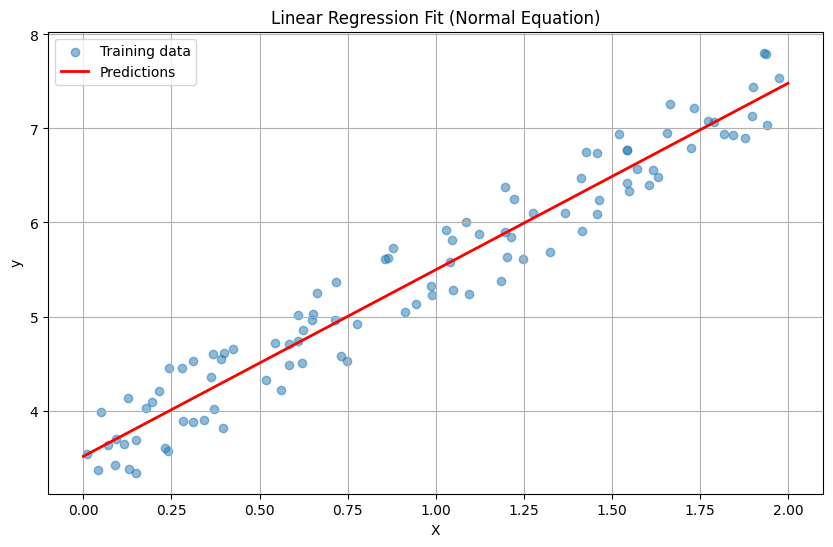

In [35]:
# ============================================================
# VISUALIZING THE FITTED LINE
# ============================================================
# Now that we have our optimal parameters (θ₀ and θ₁),
# let's visualize how well our line fits the training data

# Step 1: Create points for drawing the prediction line
# We want to draw a line from x=0 to x=2 (the range of our data)
# We only need 2 points to draw a straight line
x_new = np.array([[0], [2]])  # Two points: start at x=0, end at x=2
                               # Shape: (2, 1) - two x values as a column vector

# Step 2: Add bias term to our new x values (same as we did for training data)
# Remember: we need the ones column for the intercept term
x_new_b = np.c_[np.ones((2, 1)), x_new]  # Result: [[1, 0], [1, 2]]
                                         # Shape: (2, 2)

# Step 3: Make predictions using our learned model
# Formula: y_predict = x_new_b @ theta_best
# This computes: [[1, 0], [1, 2]] @ [[θ₀], [θ₁]]
# Which gives us: [[θ₀ + 0·θ₁], [θ₀ + 2·θ₁]]
# Or in other words: [y at x=0, y at x=2]
y_predict = x_new_b.dot(theta_best)  # Shape: (2, 1)
                                     # These are the y values on our fitted line

# Step 4: Plot everything
plt.figure(figsize=(10, 6))  # Create a 10x6 inch figure

# Plot the original training data as scatter points
plt.scatter(x, y, alpha=0.5, label='Training data')  
# alpha=0.5 makes points semi-transparent
# label='...' adds this to the legend

# Plot our prediction line connecting the two predicted points
plt.plot(x_new, y_predict, "r-", linewidth=2, label='Predictions')
# "r-" means red solid line
# linewidth=2 makes the line thicker
# This draws a line from (0, y_predict[0]) to (2, y_predict[1])

# Add labels and formatting
plt.xlabel('X')  # Label for x-axis
plt.ylabel('y')  # Label for y-axis
plt.title('Linear Regression Fit (Normal Equation)')  # Title at the top
plt.legend()  # Show the legend (Training data, Predictions)
plt.grid(True)  # Add gridlines for easier reading
plt.show()  # Display the plot

In [36]:
# ============================================================
# GRADIENT DESCENT FROM SCRATCH
# ============================================================
# Instead of solving directly (Normal Equation), we can use an iterative
# approach called Gradient Descent that gradually improves our parameters

# ------------------------------------------------------------
# Function 1: Compute Cost (Mean Squared Error)
# ------------------------------------------------------------
def compute_cost(x, y, theta):
    """
    Calculate how "wrong" our current predictions are
    
    Cost Function: J(θ) = (1/2m) Σ(ŷᵢ - yᵢ)²
    
    Lower cost = better fit to the data
    Goal of learning: minimize this cost
    
    Args:
        x: Feature matrix with bias term, shape (m, 2)
        y: True output values, shape (m, 1)
        theta: Current parameters [θ₀, θ₁], shape (2, 1)
    
    Returns:
        cost: A single number representing total error
    """
    m = len(y)  # Number of training examples
    
    # Make predictions using current theta: ŷ = X·θ
    predictions = x.dot(theta)  # Shape: (m, 1)
    
    # Calculate errors: how far off each prediction is
    errors = predictions - y  # Shape: (m, 1)
    
    # Compute Mean Squared Error (MSE)
    # We square the errors to penalize large mistakes more
    # Divide by 2m (the 2 makes the derivative cleaner later)
    cost = (1/(2*m)) * np.sum(errors**2)  # Single number
    
    return cost

# ------------------------------------------------------------
# Function 2: Gradient Descent Algorithm
# ------------------------------------------------------------
def gradient_descent(x, y, theta, learning_rate, n_iterations):
    """
    Iteratively adjust theta to minimize the cost function
    
    Update Rule: θ := θ - α · (1/m) · Xᵀ(Xθ - y)
    
    How it works:
    1. Compute predictions with current θ
    2. Calculate how wrong we are (errors)
    3. Compute gradient (direction to move θ)
    4. Update θ by taking a small step in that direction
    5. Repeat!
    
    Args:
        x: Feature matrix with bias, shape (m, 2)
        y: True outputs, shape (m, 1)
        theta: Initial parameters, shape (2, 1)
        learning_rate (α): Step size for each update (0.1 = 10% step)
        n_iterations: How many times to update theta
    
    Returns:
        theta: Final learned parameters
        cost_history: List of costs at each iteration (to track progress)
    """
    m = len(y)  # Number of training examples
    cost_history = []  # Store cost at each iteration to track improvement
    
    # Main learning loop - repeat n_iterations times
    for iteration in range(n_iterations):
        # Step 1: Make predictions with current theta
        predictions = x.dot(theta)  # ŷ = X·θ, shape (m, 1)
        
        # Step 2: Calculate errors (how wrong our predictions are)
        errors = predictions - y  # Shape: (m, 1)
        
        # Step 3: Compute gradient (direction of steepest increase in cost)
        # Gradient = (1/m) · Xᵀ·errors
        # This tells us which direction to move θ to reduce cost
        gradient = (1/m) * x.T.dot(errors)  # Shape: (2, 1)
        
        # Step 4: Update parameters by moving in OPPOSITE direction of gradient
        # We subtract because we want to go DOWN the hill (minimize cost)
        # learning_rate controls how big of a step we take
        theta = theta - learning_rate * gradient
        
        # Step 5: Calculate and store the new cost
        cost = compute_cost(x, y, theta)
        cost_history.append(cost)
        
        # Print progress every 100 iterations to monitor learning
        if iteration % 100 == 0:
            print(f"Iteration {iteration}: Cost = {cost:.4f}")
    
    return theta, cost_history

# ============================================================
# RUN GRADIENT DESCENT
# ============================================================

# Initialize parameters randomly
# Starting with random values instead of zeros helps with learning
theta_initial = np.random.randn(2, 1)  # Random values from standard normal distribution
                                       # Shape: (2, 1) for [θ₀, θ₁]

# Set hyperparameters (values we choose before training)
learning_rate = 0.1  # α = 0.1 means take 10% steps
                     # Too large: might overshoot and diverge
                     # Too small: learning is very slow
                     
n_iterations = 1000  # Number of update steps
                     # More iterations = better convergence (usually)
                     # But diminishing returns after a point

# Display initial state
print("Starting Gradient Descent...")
print(f"Initial theta: {theta_initial.flatten()}")  # Show random starting point
print(f"Initial cost: {compute_cost(x_b, y, theta_initial):.4f}\n")  # How bad is our initial guess?

# Run the gradient descent algorithm!
theta_gd, cost_history = gradient_descent(x_b, y, theta_initial, learning_rate, n_iterations)

# ============================================================
# DISPLAY RESULTS
# ============================================================
print(f"\nFinal parameters (Gradient Descent):")
print(f"θ₀ (intercept) = {theta_gd[0][0]:.4f}")  # Should be close to 3.0
print(f"θ₁ (slope)     = {theta_gd[1][0]:.4f}")  # Should be close to 2.0

# Compare with Normal Equation results
# Both methods should give nearly identical results!
print(f"\nComparison:")
print(f"Normal Equation:  θ₀={theta_best[0][0]:.4f}, θ₁={theta_best[1][0]:.4f}")
print(f"Gradient Descent: θ₀={theta_gd[0][0]:.4f}, θ₁={theta_gd[1][0]:.4f}")

Starting Gradient Descent...
Initial theta: [-0.68002472  0.2322537 ]
Initial cost: 17.6336

Iteration 0: Cost = 11.2310
Iteration 100: Cost = 0.0530
Iteration 200: Cost = 0.0428
Iteration 300: Cost = 0.0425
Iteration 400: Cost = 0.0425
Iteration 500: Cost = 0.0425
Iteration 600: Cost = 0.0425
Iteration 700: Cost = 0.0425
Iteration 800: Cost = 0.0425
Iteration 900: Cost = 0.0425

Final parameters (Gradient Descent):
θ₀ (intercept) = 3.5136
θ₁ (slope)     = 1.9832

Comparison:
Normal Equation:  θ₀=3.5136, θ₁=1.9832
Gradient Descent: θ₀=3.5136, θ₁=1.9832


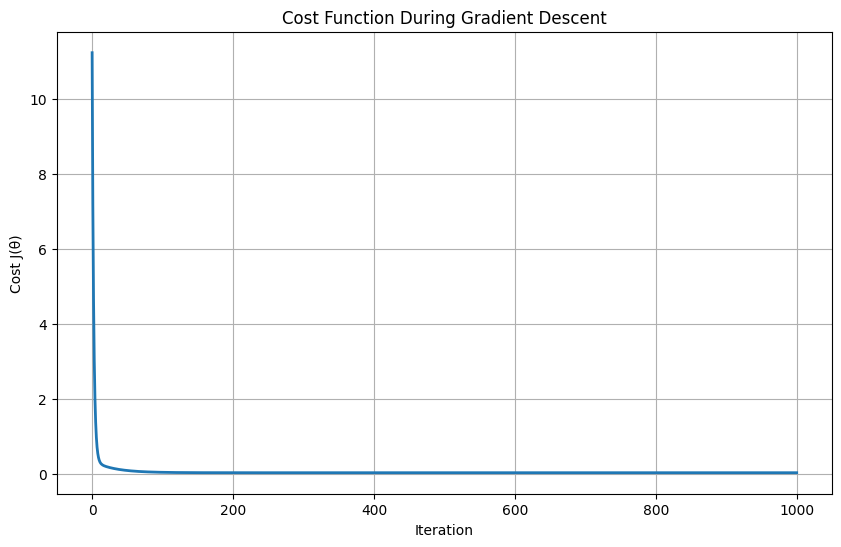

Starting cost: 11.2310
Final cost:    0.0425
Cost reduction: 11.1886


In [37]:
# ============================================================
# VISUALIZE LEARNING PROGRESS (COST OVER TIME)
# ============================================================
# Let's plot how the cost decreased during gradient descent
# This helps us verify that learning worked properly

# Create the plot
plt.figure(figsize=(10, 6))  # Create 10x6 inch figure

# Plot cost vs iteration number
plt.plot(cost_history, linewidth=2)  # cost_history is a list of 1000 costs
                                     # x-axis: iteration number (0, 1, 2, ..., 999)
                                     # y-axis: cost value at that iteration
                                     # linewidth=2 makes the line thicker and easier to see

# Add labels and formatting
plt.xlabel('Iteration')  # Label for x-axis (which iteration we're at)
plt.ylabel('Cost J(θ)')  # Label for y-axis (the cost function value)
                         # J(θ) is standard notation for the cost function
plt.title('Cost Function During Gradient Descent')  # Title
plt.grid(True)  # Add gridlines for easier reading
plt.show()  # Display the plot

# Print numerical summary of the learning process
print(f"Starting cost: {cost_history[0]:.4f}")   # First cost (iteration 0)
                                                  # cost_history[0] gets first element
print(f"Final cost:    {cost_history[-1]:.4f}")  # Last cost (iteration 999)
                                                  # cost_history[-1] gets last element
print(f"Cost reduction: {cost_history[0] - cost_history[-1]:.4f}")  # How much we improved
                                                                     # Larger reduction = more learning

# What to look for in the plot:
# - Cost should START HIGH (bad initial guess)
# - Cost should DECREASE SMOOTHLY (learning is working)
# - Cost should FLATTEN OUT (converged to minimum)
# - If cost increases or oscillates wildly, learning_rate is too high!

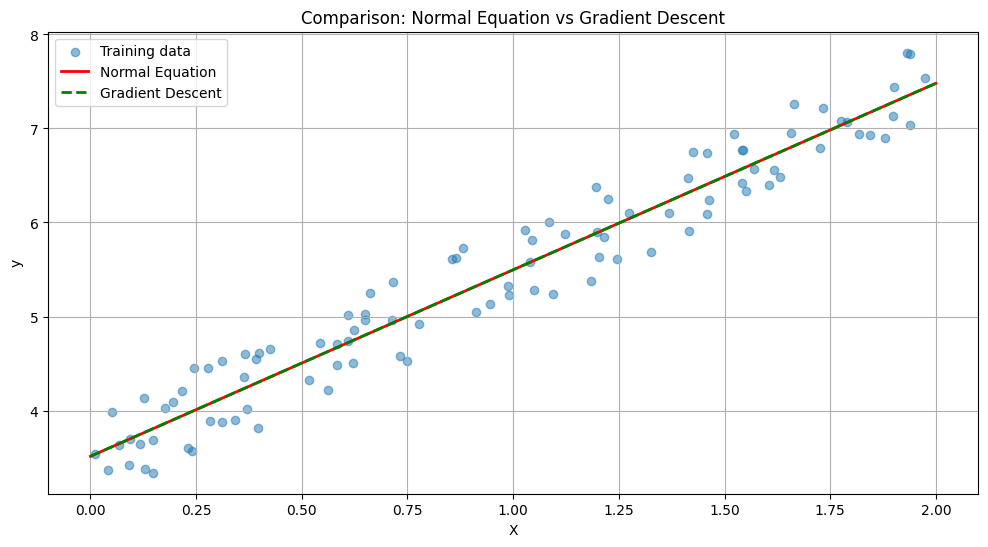

In [38]:
# ============================================================
# COMPARE BOTH METHODS VISUALLY
# ============================================================
# Plot predictions from both Normal Equation and Gradient Descent
# They should be identical (or nearly so)!

# Step 1: Make predictions using both sets of learned parameters
# Remember: x_new_b is [[1, 0], [1, 2]] - our two points for drawing the line

y_predict_normal = x_new_b.dot(theta_best)  # Predictions using Normal Equation θ
                                             # Shape: (2, 1)
                                             # Result: [y at x=0, y at x=2]

y_predict_gd = x_new_b.dot(theta_gd)  # Predictions using Gradient Descent θ
                                       # Shape: (2, 1)
                                       # Should be (almost) identical to y_predict_normal!

# Step 2: Create comparison plot
plt.figure(figsize=(12, 6))  # Create 12x6 inch figure (wider to fit legend)

# Plot the original training data
plt.scatter(x, y, alpha=0.5, label='Training data')
# alpha=0.5 makes points semi-transparent
# label adds this to the legend

# Plot the Normal Equation prediction line
plt.plot(x_new, y_predict_normal, "r-", linewidth=2, label='Normal Equation')
# "r-" = red solid line
# linewidth=2 makes it easier to see
# Draws line from (0, y_predict_normal[0]) to (2, y_predict_normal[1])

# Plot the Gradient Descent prediction line
plt.plot(x_new, y_predict_gd, "g--", linewidth=2, label='Gradient Descent')
# "g--" = green dashed line
# linewidth=2 makes it visible
# The dashed style helps distinguish it from the Normal Equation line
# (Though in practice they'll overlap perfectly!)

# Add labels and formatting
plt.xlabel('X')  # Label for x-axis
plt.ylabel('y')  # Label for y-axis
plt.title('Comparison: Normal Equation vs Gradient Descent')  # Title
plt.legend()  # Show legend to identify which line is which
              # Will show: Training data, Normal Equation (red), Gradient Descent (green)
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot

# What to observe:
# - The two lines should OVERLAP PERFECTLY (or nearly so)
# - Both methods find the same optimal parameters
# - Normal Equation: Direct calculation (fast, exact)
# - Gradient Descent: Iterative approach (slower, but scales better for large datasets)

Experiment 1: Learning Rate Too Large
Iteration 0: Cost = 20.2722


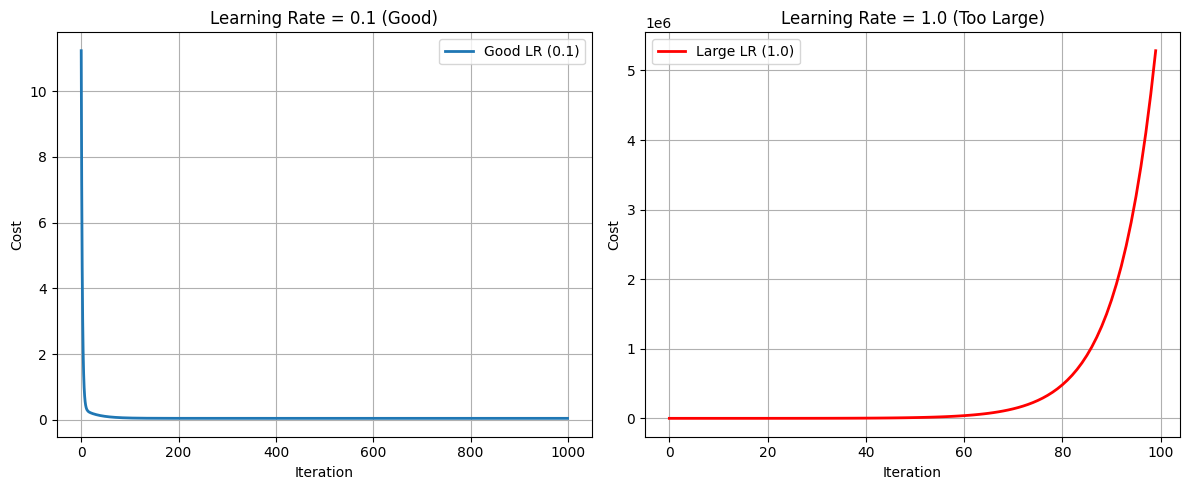


Good LR final cost: 0.0425
Large LR final cost: 5283789.8842


In [39]:
# ============================================================
# EXPERIMENT: WHAT HAPPENS WITH A BAD LEARNING RATE?
# ============================================================
# Let's see what happens when we choose a learning rate that's too large
# This demonstrates the importance of choosing good hyperparameters

print("Experiment 1: Learning Rate Too Large")
print("=" * 50)

# Initialize new random starting point for fair comparison
theta_initial = np.random.randn(2, 1)  # Random starting parameters
                                       # Shape: (2, 1)

# Set learning rate MUCH TOO LARGE
learning_rate_large = 1.0  # α = 1.0 is way too large for this problem!
                          # With large learning rates, gradient descent "overshoots"
                          # Instead of descending smoothly, it bounces around wildly

n_iterations = 100  # Run for only 100 iterations to see what happens

# Run gradient descent with the bad learning rate
theta_diverge, cost_history_diverge = gradient_descent(
    x_b,                    # Our training data with bias term
    y,                      # Our target values
    theta_initial,          # Random starting point
    learning_rate_large,    # The problematically large learning rate
    n_iterations            # Number of iterations
)
# Note: This will likely show cost increasing or oscillating wildly!

# ============================================================
# VISUALIZE THE DIFFERENCE
# ============================================================
# Create side-by-side plots to compare good vs bad learning rates

plt.figure(figsize=(12, 5))  # Create 12x5 inch figure for two subplots

# Left subplot: Good learning rate (from earlier)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1 (left)
plt.plot(cost_history, label='Good LR (0.1)', linewidth=2)
# cost_history is from our earlier successful training
# This should show smooth, steady decrease

plt.xlabel('Iteration')  # Label x-axis
plt.ylabel('Cost')       # Label y-axis
plt.title('Learning Rate = 0.1 (Good)')  # Title for this subplot
plt.grid(True)   # Add gridlines
plt.legend()     # Show legend

# Right subplot: Bad learning rate (current experiment)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2 (right)
plt.plot(cost_history_diverge, label='Large LR (1.0)', linewidth=2, color='red')
# cost_history_diverge is from our experiment with large learning rate
# This should show wild oscillations or increasing cost (divergence)
# Red color emphasizes this is the "bad" example

plt.xlabel('Iteration')  # Label x-axis
plt.ylabel('Cost')       # Label y-axis
plt.title('Learning Rate = 1.0 (Too Large)')  # Title for this subplot
plt.grid(True)   # Add gridlines
plt.legend()     # Show legend

plt.tight_layout()  # Automatically adjust spacing between subplots
                    # Prevents titles/labels from overlapping
plt.show()  # Display both plots

# ============================================================
# PRINT COMPARISON
# ============================================================
# Compare final costs to see the dramatic difference

print(f"\nGood LR final cost: {cost_history[-1]:.4f}")  # Should be low (good fit)
                                                         # cost_history[-1] = last element
print(f"Large LR final cost: {cost_history_diverge[-1]:.4f}")  # Likely high (poor fit)
                                                                # Shows divergence!

# Key Takeaway:
# - Left plot: Smooth decrease → Learning rate is just right
# - Right plot: Wild jumps or increase → Learning rate is too large
# - This is why tuning hyperparameters is critical in machine learning!
# - Too large: diverges (overshoots the minimum)
# - Too small: converges very slowly (takes forever)
# - Just right: smooth, fast convergence


Experiment 2: Learning Rate Too Small
Iteration 0: Cost = 5.1245
Iteration 100: Cost = 3.4051
Iteration 200: Cost = 2.2678
Iteration 300: Cost = 1.5156
Iteration 400: Cost = 1.0181
Iteration 500: Cost = 0.6890
Iteration 600: Cost = 0.4713
Iteration 700: Cost = 0.3273
Iteration 800: Cost = 0.2320
Iteration 900: Cost = 0.1689


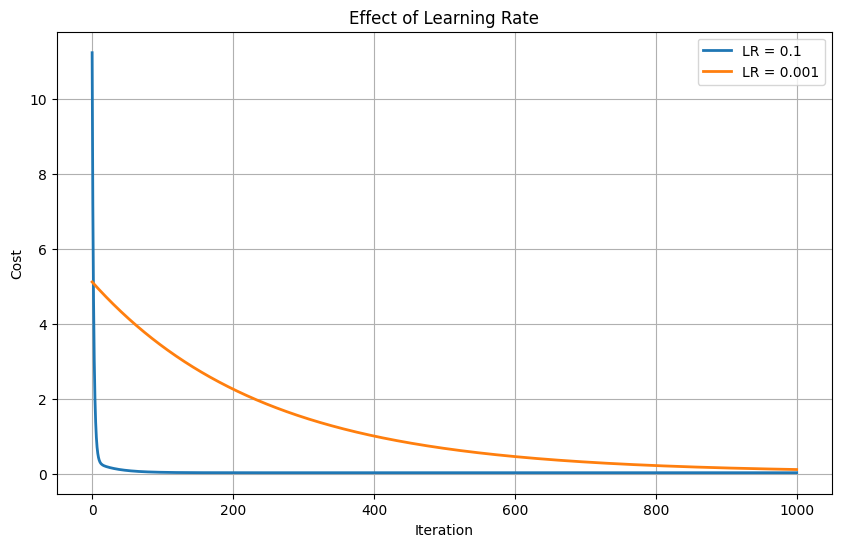


Good LR (0.1) - Final cost: 0.0425
Small LR (0.001) - Final cost: 0.1275

Good LR reached cost 0.0425 in 1000 iterations
Small LR only reached 0.1275 in 1000 iterations


In [40]:
# ============================================================
# EXPERIMENT 2: LEARNING RATE TOO SMALL
# ============================================================
# Now let's see what happens when the learning rate is too small
# This is the opposite problem from Experiment 1

print("\nExperiment 2: Learning Rate Too Small")
print("=" * 50)

# Initialize new random starting point
theta_initial = np.random.randn(2, 1)  # Random starting parameters
                                       # Shape: (2, 1)

# Set learning rate VERY SMALL
learning_rate_small = 0.001  # α = 0.001 is too small (100x smaller than optimal)
                            # With tiny learning rates, gradient descent takes baby steps
                            # Learning is correct but VERY SLOW

n_iterations = 1000  # Same 1000 iterations as before

# Run gradient descent with the small learning rate
theta_slow, cost_history_slow = gradient_descent(
    x_b,                    # Our training data with bias term
    y,                      # Our target values
    theta_initial,          # Random starting point
    learning_rate_small,    # The very small learning rate
    n_iterations            # Number of iterations
)
# This will converge, but MUCH slower than with good learning rate

# ============================================================
# COMPARE GOOD VS TOO SMALL LEARNING RATE
# ============================================================
# Plot both learning curves on same graph to compare

plt.figure(figsize=(10, 6))  # Create 10x6 inch figure

# Plot the good learning rate (0.1) from earlier
plt.plot(cost_history, label='LR = 0.1', linewidth=2)
# This should show quick, smooth descent to minimum

# Plot the small learning rate (0.001)
plt.plot(cost_history_slow, label='LR = 0.001', linewidth=2)
# This should show slow, gradual descent
# After 1000 iterations, it might not even reach the minimum yet!

# Add labels and formatting
plt.xlabel('Iteration')  # Label x-axis
plt.ylabel('Cost')       # Label y-axis
plt.title('Effect of Learning Rate')  # Title
plt.legend()  # Show which line is which
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot

# ============================================================
# PRINT COMPARISON
# ============================================================
print(f"\nGood LR (0.1) - Final cost: {cost_history[-1]:.4f}")
# Should be very low (converged)

print(f"Small LR (0.001) - Final cost: {cost_history_slow[-1]:.4f}")
# Likely still higher (hasn't fully converged yet)

print(f"\nGood LR reached cost {cost_history[-1]:.4f} in 1000 iterations")
print(f"Small LR only reached {cost_history_slow[-1]:.4f} in 1000 iterations")

# Key Takeaway:
# - Too LARGE learning rate: Diverges (bounces around, gets worse)
# - Too SMALL learning rate: Converges slowly (correct direction, but too slow)
# - Just right (Goldilocks): Fast and smooth convergence
# - In practice: Start with common values (0.1, 0.01) and adjust based on cost plot


Experiment 3: Multiple Features
Data shape: X=(100, 3), y=(100, 1)
True parameters: θ₀=4, θ₁=3, θ₂=2
Iteration 0: Cost = 7.8121
Iteration 100: Cost = 0.4156
Iteration 200: Cost = 0.4154
Iteration 300: Cost = 0.4154
Iteration 400: Cost = 0.4154
Iteration 500: Cost = 0.4154
Iteration 600: Cost = 0.4154
Iteration 700: Cost = 0.4154
Iteration 800: Cost = 0.4154
Iteration 900: Cost = 0.4154

Normal Equation:
θ₀=3.8353, θ₁=3.1811, θ₂=2.0207

Gradient Descent:
θ₀=3.8353, θ₁=3.1811, θ₂=2.0207


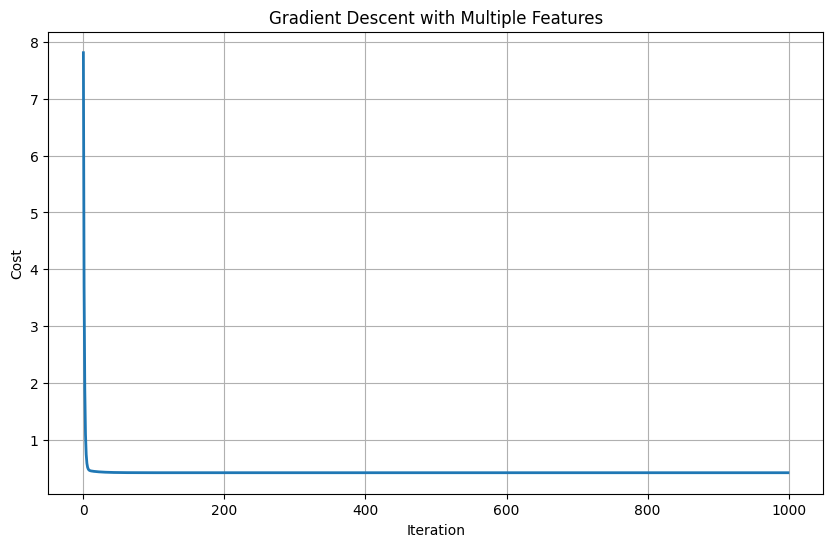

In [41]:
# ============================================================
# EXPERIMENT 3: MULTIPLE FEATURES (MULTIVARIATE LINEAR REGRESSION)
# ============================================================
# So far we've only used ONE feature (x)
# In real-world problems, we often have MULTIPLE features
# Example: predicting house price using size, bedrooms, age, etc.

print("\nExperiment 3: Multiple Features")
print("=" * 50)

# ============================================================
# Generate Synthetic Data with 2 Features
# ============================================================
# True relationship: y = 4 + 3*x₁ + 2*x₂ + noise
# where:
#   - 4 is the intercept (θ₀)
#   - 3 is the weight for feature 1 (θ₁)
#   - 2 is the weight for feature 2 (θ₂)

m = 100  # Number of training examples

# Generate 2 features
X_multi = 2 * np.random.rand(m, 2)  # Shape: (100, 2)
                                    # Each row is one example with 2 features
                                    # Column 0: x₁ values (0 to 2)
                                    # Column 1: x₂ values (0 to 2)

# Generate y values using the true relationship
y_multi = 4 + 3*X_multi[:, 0] + 2*X_multi[:, 1] + np.random.randn(m)
# X_multi[:, 0] gets all values from column 0 (feature 1)
# X_multi[:, 1] gets all values from column 1 (feature 2)
# np.random.randn(m) adds Gaussian noise (mean=0, std=1)

y_multi = y_multi.reshape(-1, 1)  # Reshape from (100,) to (100, 1)
                                  # Makes it a column vector for matrix operations

# Add bias term (column of ones)
X_multi_b = np.c_[np.ones((m, 1)), X_multi]  # Shape: (100, 3)
                                             # Column 0: all 1s (for θ₀)
                                             # Column 1: x₁ values (for θ₁)
                                             # Column 2: x₂ values (for θ₂)

print(f"Data shape: X={X_multi_b.shape}, y={y_multi.shape}")
print(f"True parameters: θ₀=4, θ₁=3, θ₂=2")

# ============================================================
# Solve Using Normal Equation
# ============================================================
# Same formula as before: θ = (XᵀX)⁻¹Xᵀy
# But now θ has 3 elements instead of 2!

theta_multi_normal = np.linalg.inv(X_multi_b.T.dot(X_multi_b)).dot(X_multi_b.T).dot(y_multi)
# Result shape: (3, 1) containing [θ₀, θ₁, θ₂]

# ============================================================
# Solve Using Gradient Descent
# ============================================================
theta_initial = np.random.randn(3, 1)  # Now we need 3 parameters!
                                       # Shape: (3, 1) for [θ₀, θ₁, θ₂]

learning_rate = 0.1  # Same learning rate as before
n_iterations = 1000  # Same number of iterations

# Run gradient descent
# Our gradient_descent function works for ANY number of features!
theta_multi_gd, cost_history_multi = gradient_descent(
    X_multi_b,       # Training data with 3 columns (bias + 2 features)
    y_multi,         # Target values
    theta_initial,   # Random starting point with 3 parameters
    learning_rate,   # Learning rate
    n_iterations     # Number of iterations
)

# ============================================================
# DISPLAY RESULTS
# ============================================================
print(f"\nNormal Equation:")
print(f"θ₀={theta_multi_normal[0][0]:.4f}, θ₁={theta_multi_normal[1][0]:.4f}, θ₂={theta_multi_normal[2][0]:.4f}")
# Should be close to: θ₀=4.0, θ₁=3.0, θ₂=2.0

print(f"\nGradient Descent:")
print(f"θ₀={theta_multi_gd[0][0]:.4f}, θ₁={theta_multi_gd[1][0]:.4f}, θ₂={theta_multi_gd[2][0]:.4f}")
# Should match Normal Equation results (and be close to true values)

# ============================================================
# Plot Learning Curve
# ============================================================
plt.figure(figsize=(10, 6))  # Create figure
plt.plot(cost_history_multi, linewidth=2)  # Plot cost vs iteration
plt.xlabel('Iteration')  # Label x-axis
plt.ylabel('Cost')       # Label y-axis
plt.title('Gradient Descent with Multiple Features')  # Title
plt.grid(True)  # Add gridlines
plt.show()  # Display plot

# Key Takeaway:
# - Linear regression works with ANY number of features!
# - The math is the same, just with higher-dimensional matrices
# - Our model becomes: y = θ₀ + θ₁·x₁ + θ₂·x₂ + ... + θₙ·xₙ
# - Both Normal Equation and Gradient Descent scale to multiple features


Experiment 4: Feature Scaling
Features have very different scales:
Feature 1 range: [2.0, 96.9]
Feature 2 range: [0.0, 1.0]

Running gradient descent WITHOUT feature scaling...
Using very small learning rate: 0.0001
Iteration 0: Cost = 4780.9090
Iteration 100: Cost = 8.9362
Iteration 200: Cost = 8.8837
Iteration 300: Cost = 8.8316
Iteration 400: Cost = 8.7799
Iteration 500: Cost = 8.7286
Iteration 600: Cost = 8.6778
Iteration 700: Cost = 8.6273
Iteration 800: Cost = 8.5772
Iteration 900: Cost = 8.5275

Running gradient descent WITH feature scaling...
Using normal learning rate: 0.1
Iteration 0: Cost = 4225.8854
Iteration 100: Cost = 2.2362
Iteration 200: Cost = 2.2362
Iteration 300: Cost = 2.2362
Iteration 400: Cost = 2.2362
Iteration 500: Cost = 2.2362
Iteration 600: Cost = 2.2362
Iteration 700: Cost = 2.2362
Iteration 800: Cost = 2.2362
Iteration 900: Cost = 2.2362


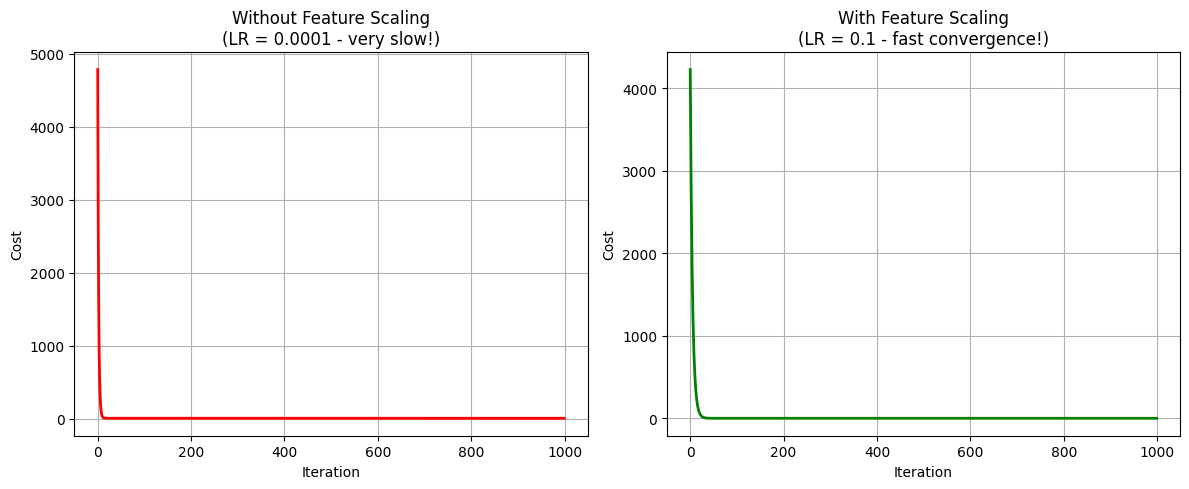


RESULTS:
Without scaling - Final cost: 8.4787
                  Learning rate: 0.0001 (VERY SMALL)

With scaling    - Final cost: 2.2362
                  Learning rate: 0.1 (NORMAL)

With feature scaling, we can use a learning rate 1000x LARGER!
This means MUCH faster convergence!


In [42]:
# ============================================================
# EXPERIMENT 4: FEATURE SCALING (VERY IMPORTANT!)
# ============================================================
# When features have very different scales (e.g., one is 0-1, another is 0-100),
# gradient descent has trouble converging efficiently
# This demonstrates WHY feature scaling is crucial in practice

print("\nExperiment 4: Feature Scaling")
print("=" * 50)

# ============================================================
# Create Data with VERY DIFFERENT SCALES
# ============================================================
m = 100  # Number of examples

# Generate 2 features with VASTLY different ranges
X_unscaled = np.random.rand(m, 2)  # Start with values between 0 and 1

X_unscaled[:, 0] = X_unscaled[:, 0] * 100  # Feature 1: Scale to 0-100 (LARGE)
                                           # [:, 0] selects all rows, column 0
                                           # This feature has large values

X_unscaled[:, 1] = X_unscaled[:, 1] * 1    # Feature 2: Keep at 0-1 (SMALL)
                                           # [:, 1] selects all rows, column 1
                                           # This feature has small values

# Generate y values
# True relationship: y = 3 + 2*x₁ + 5*x₂ + noise
y_scale = 3 + 2*X_unscaled[:, 0] + 5*X_unscaled[:, 1] + np.random.randn(m)*2
y_scale = y_scale.reshape(-1, 1)  # Reshape to column vector

# Add bias term
X_unscaled_b = np.c_[np.ones((m, 1)), X_unscaled]  # Shape: (100, 3)

print("Features have very different scales:")
print(f"Feature 1 range: [{X_unscaled[:, 0].min():.1f}, {X_unscaled[:, 0].max():.1f}]")
print(f"Feature 2 range: [{X_unscaled[:, 1].min():.1f}, {X_unscaled[:, 1].max():.1f}]")
# Feature 1 is ~100x larger than Feature 2!

# ============================================================
# Try Gradient Descent WITHOUT Feature Scaling
# ============================================================
# When features have different scales, gradient descent struggles because:
# - Large features dominate the gradient
# - Small learning rates needed to avoid divergence
# - Convergence is very slow or unstable

theta_init = np.random.randn(3, 1)  # Random starting point
learning_rate_unscaled = 0.0001  # VERY small LR to prevent overflow
                                 # This is 1000x smaller than our usual 0.1!
                                 # We NEED such a tiny LR because of unscaled features
n_iterations = 1000

print("\nRunning gradient descent WITHOUT feature scaling...")
print(f"Using very small learning rate: {learning_rate_unscaled}")

theta_unscaled, cost_unscaled = gradient_descent(
    X_unscaled_b,          # Unscaled data (features have different ranges)
    y_scale,               # Target values
    theta_init,            # Starting parameters
    learning_rate_unscaled,  # VERY small learning rate
    n_iterations
)

# ============================================================
# Now WITH Feature Scaling (Standardization)
# ============================================================
# Standardization formula: x_scaled = (x - mean) / std
# This transforms features to have:
#   - Mean = 0
#   - Standard deviation = 1
# Now all features are on the same scale!

X_scaled = X_unscaled.copy()  # Make a copy to preserve original

# Standardize feature 1
X_scaled[:, 0] = (X_scaled[:, 0] - X_scaled[:, 0].mean()) / X_scaled[:, 0].std()
# Subtract mean (centers around 0)
# Divide by std (scales to unit variance)

# Standardize feature 2
X_scaled[:, 1] = (X_scaled[:, 1] - X_scaled[:, 1].mean()) / X_scaled[:, 1].std()
# Now both features have mean=0, std=1

X_scaled_b = np.c_[np.ones((m, 1)), X_scaled]  # Add bias term

# Run gradient descent with MUCH LARGER learning rate
# Because features are scaled, we can use a normal learning rate!
theta_init = np.random.randn(3, 1)  # New random starting point
learning_rate_scaled = 0.1  # Normal learning rate (1000x larger!)
                            # This works fine with scaled features

print(f"\nRunning gradient descent WITH feature scaling...")
print(f"Using normal learning rate: {learning_rate_scaled}")

theta_scaled, cost_scaled = gradient_descent(
    X_scaled_b,          # Scaled data (all features have similar ranges)
    y_scale,             # Same target values
    theta_init,          # Starting parameters
    learning_rate_scaled,  # Normal learning rate works fine now!
    n_iterations
)
# This should converge much better and faster!

# ============================================================
# COMPARE RESULTS VISUALLY
# ============================================================
plt.figure(figsize=(12, 5))  # Create figure for side-by-side plots

# Left: Without feature scaling
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.plot(cost_unscaled, linewidth=2, color='red')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Without Feature Scaling\n(LR = 0.0001 - very slow!)')
plt.grid(True)
# This plot will show:
# - VERY slow convergence (because tiny learning rate)
# - Still might not reach minimum after 1000 iterations
# - We HAD to use tiny LR to avoid overflow

# Right: With feature scaling
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.plot(cost_scaled, linewidth=2, color='green')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('With Feature Scaling\n(LR = 0.1 - fast convergence!)')
plt.grid(True)
# This plot should show:
# - Smooth, FAST convergence
# - Reaches minimum quickly
# - We can use 1000x larger LR safely!

plt.tight_layout()  # Adjust spacing
plt.show()

# ============================================================
# PRINT COMPARISON
# ============================================================
print(f"\n" + "="*50)
print("RESULTS:")
print("="*50)
print(f"Without scaling - Final cost: {cost_unscaled[-1]:.4f}")
print(f"                  Learning rate: {learning_rate_unscaled} (VERY SMALL)")
# Higher cost because learning is too slow

print(f"\nWith scaling    - Final cost: {cost_scaled[-1]:.4f}")
print(f"                  Learning rate: {learning_rate_scaled} (NORMAL)")
# Lower cost because learning worked well

print(f"\nWith feature scaling, we can use a learning rate {learning_rate_scaled/learning_rate_unscaled:.0f}x LARGER!")
print("This means MUCH faster convergence!")

# Key Takeaways:
# - ALWAYS scale features when using gradient descent!
# - Without scaling:
#   * Need TINY learning rates (very slow)
#   * Risk of numerical overflow
#   * Poor convergence
# - With scaling:
#   * Can use NORMAL learning rates (fast)
#   * Stable training
#   * Excellent convergence
# 
# Common scaling methods:
#   1. Standardization: (x - mean) / std  → mean=0, std=1
#   2. Min-Max scaling: (x - min) / (max - min)  → range [0, 1]
# 
# - Normal Equation doesn't need feature scaling (direct calculation)
# - But gradient descent absolutely does for features with different scales!

In [43]:
# ============================================================
# PART 6: MAKING PREDICTIONS ON NEW DATA
# ============================================================
# Now that we've trained our model, let's use it to predict y
# for x values we've never seen before!
# This is the whole point of machine learning - generalization

print("Part 6: Making Predictions")
print("=" * 50)

# Display the parameters we learned from training
# These define our prediction line: y = θ₀ + θ₁·x
print(f"Our learned parameters: θ₀={theta_best[0][0]:.4f}, θ₁={theta_best[1][0]:.4f}")
# θ₀ ≈ 3.5 (intercept/bias)
# θ₁ ≈ 2.0 (slope/weight)

# ============================================================
# Create New Data Points for Prediction
# ============================================================
# These are x values we want predictions for
# They're DIFFERENT from our training data!
X_new_examples = np.array([[0.5], [1.0], [1.5], [1.8]])  # Shape: (4, 1)
                                                          # 4 new x values as column vector

# Add bias term (column of ones) - same preprocessing as training!
X_new_examples_b = np.c_[np.ones((len(X_new_examples), 1)), X_new_examples]
# Result: [[1, 0.5], [1, 1.0], [1, 1.5], [1, 1.8]]
# Shape: (4, 2)

# ============================================================
# Make Predictions Using Our Learned Model
# ============================================================
# Prediction formula: ŷ = X · θ
# For each example: ŷ = θ₀ + θ₁·x
predictions = X_new_examples_b.dot(theta_best)  # Matrix multiplication
                                                # Shape: (4, 1) - one prediction per example

# Display predictions
print("\nPredictions for new data:")
for i, (x_val, pred) in enumerate(zip(X_new_examples, predictions)):
    # zip combines x values and predictions into pairs
    print(f"x = {x_val[0]:.2f} → predicted y = {pred[0]:.4f}")
    # Example: x = 0.50 → predicted y = 4.5052

# ============================================================
# Compare with True Relationship
# ============================================================
# Remember: we generated our data using y = 3 + 2x + noise
# The "true" relationship (without noise) is y = 3 + 2x
# Let's see how close our predictions are to the true values

print("\nTrue values (y = 3 + 2x):")
for x_val in X_new_examples:
    true_y = 3 + 2*x_val[0]  # The true relationship without noise
    print(f"x = {x_val[0]:.2f} → true y = {true_y:.4f}")

# Key Observations:
# - Our predictions are CLOSE to true values, but not exact
# - This is because our model learned from NOISY data
# - The learned θ₀ ≈ 3.5 (true: 3.0) and θ₁ ≈ 2.0 (true: 2.0)
# - The slight difference in θ₀ is due to the noise in training data
# - This is completely normal and expected!

Part 6: Making Predictions
Our learned parameters: θ₀=3.5136, θ₁=1.9832

Predictions for new data:
x = 0.50 → predicted y = 4.5052
x = 1.00 → predicted y = 5.4968
x = 1.50 → predicted y = 6.4884
x = 1.80 → predicted y = 7.0834

True values (y = 3 + 2x):
x = 0.50 → true y = 4.0000
x = 1.00 → true y = 5.0000
x = 1.50 → true y = 6.0000
x = 1.80 → true y = 6.6000



Train/Test Split
Total examples: 200
Training examples: 160
Test examples: 40

Parameters learned from training data:
θ₀=3.1284, θ₁=1.9444

Mean Squared Error:
Training set: 1.0035
Test set: 0.6559


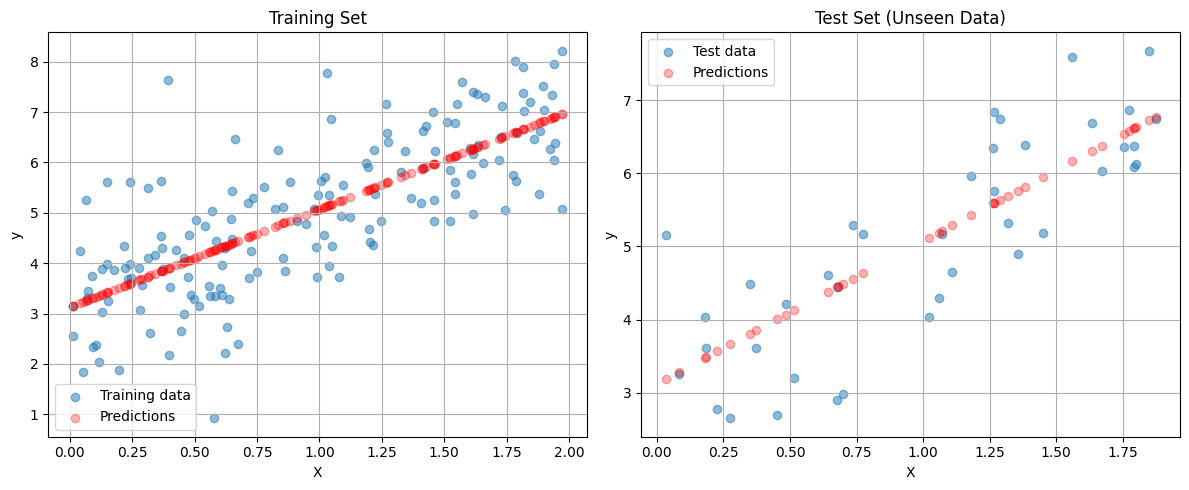

In [44]:
# ============================================================
# TRAIN/TEST SPLIT - PROPER MODEL EVALUATION
# ============================================================
# A CRITICAL concept in machine learning:
# - You should NEVER evaluate your model on the same data you trained on!
# - Why? Because the model might just "memorize" the training data (overfitting)
# - Instead, we split data into:
#   * Training set: Used to learn parameters
#   * Test set: Used to evaluate how well the model generalizes

print("\n" + "=" * 50)
print("Train/Test Split")
print("=" * 50)

# ============================================================
# Generate Fresh Data
# ============================================================
np.random.seed(42)  # Set seed for reproducibility

m_total = 200  # Total number of examples (more data for a proper split)

# Generate x values between 0 and 2
X_total = 2 * np.random.rand(m_total, 1)  # Shape: (200, 1)

# Generate y values: y = 3 + 2x + noise
y_total = 3 + 2 * X_total + np.random.randn(m_total, 1)  # Shape: (200, 1)
                                                          # np.random.randn adds Gaussian noise

# ============================================================
# Split Data into Training and Test Sets
# ============================================================
# Common split ratios: 80/20, 70/30, or 90/10
# We'll use 80% for training, 20% for testing

split_index = int(0.8 * m_total)  # 80% of 200 = 160
                                  # First 160 examples → training
                                  # Last 40 examples → testing

# Training set (first 80%)
X_train = X_total[:split_index]  # X_total[0:160] - first 160 examples
y_train = y_total[:split_index]  # Corresponding y values

# Test set (last 20%)
X_test = X_total[split_index:]   # X_total[160:200] - last 40 examples
y_test = y_total[split_index:]   # Corresponding y values

print(f"Total examples: {m_total}")
print(f"Training examples: {len(X_train)}")  # 160
print(f"Test examples: {len(X_test)}")        # 40

# ============================================================
# Train Model on Training Set ONLY
# ============================================================
# IMPORTANT: We only use training data to learn parameters!
# The test set is "hidden" during training

# Add bias term to training data
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]  # Shape: (160, 2)

# Use Normal Equation to find optimal parameters
theta_trained = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
# Shape: (2, 1) containing [θ₀, θ₁]

print(f"\nParameters learned from training data:")
print(f"θ₀={theta_trained[0][0]:.4f}, θ₁={theta_trained[1][0]:.4f}")
# Should be close to θ₀=3.0, θ₁=2.0

# ============================================================
# Evaluate on BOTH Training and Test Sets
# ============================================================
# Add bias term to test data
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]  # Shape: (40, 2)

# Make predictions on both sets
y_train_pred = X_train_b.dot(theta_trained)  # Predictions on training data
y_test_pred = X_test_b.dot(theta_trained)    # Predictions on test data (UNSEEN!)

# ============================================================
# Compute Mean Squared Error (MSE)
# ============================================================
# MSE = (1/n) Σ(y_pred - y_true)²
# Lower MSE = better predictions

train_mse = np.mean((y_train_pred - y_train)**2)  # MSE on training set
test_mse = np.mean((y_test_pred - y_test)**2)     # MSE on test set

print(f"\nMean Squared Error:")
print(f"Training set: {train_mse:.4f}")
print(f"Test set: {test_mse:.4f}")

# What to look for:
# - If test_mse ≈ train_mse: Model generalizes well! ✓
# - If test_mse >> train_mse: Model is overfitting (memorizing training data)
# - If both are high: Model is underfitting (too simple)

# ============================================================
# Visualize Training vs Test Performance
# ============================================================
plt.figure(figsize=(12, 5))  # Create figure for side-by-side plots

# Left: Training set
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.scatter(X_train, y_train, alpha=0.5, label='Training data')
# Actual training data points

plt.scatter(X_train, y_train_pred, alpha=0.3, color='red', label='Predictions')
# Our model's predictions for training data

plt.xlabel('X')
plt.ylabel('y')
plt.title('Training Set')
plt.legend()
plt.grid(True)

# Right: Test set (unseen data!)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.scatter(X_test, y_test, alpha=0.5, label='Test data')
# Actual test data points (model never saw these during training!)

plt.scatter(X_test, y_test_pred, alpha=0.3, color='red', label='Predictions')
# Our model's predictions for test data

plt.xlabel('X')
plt.ylabel('y')
plt.title('Test Set (Unseen Data)')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust spacing
plt.show()

# Key Takeaway:
# - Always evaluate on data the model hasn't seen during training
# - This gives a realistic estimate of how well your model will perform
# - Similar performance on train and test = good generalization!

In [45]:
# ============================================================
# MULTIPLE EVALUATION METRICS
# ============================================================
# MSE is just ONE way to measure how good our model is
# Different metrics capture different aspects of model performance
# Let's implement and understand several common metrics!

print("\n" + "=" * 50)
print("Multiple Evaluation Metrics")
print("=" * 50)

# ============================================================
# Metric 1: Mean Squared Error (MSE)
# ============================================================
def mean_squared_error(y_true, y_pred):
    """
    MSE: Average of squared differences
    
    Formula: MSE = (1/n) Σ(y_true - y_pred)²
    
    Properties:
    - Always positive (squared values)
    - Penalizes large errors more heavily (due to squaring)
    - Units are squared (e.g., dollars² for price prediction)
    - Lower is better, 0 is perfect
    """
    return np.mean((y_true - y_pred)**2)

# ============================================================
# Metric 2: Root Mean Squared Error (RMSE)
# ============================================================
def root_mean_squared_error(y_true, y_pred):
    """
    RMSE: Square root of MSE
    
    Formula: RMSE = √MSE = √[(1/n) Σ(y_true - y_pred)²]
    
    Properties:
    - Same units as y (more interpretable than MSE!)
    - Still penalizes large errors more heavily
    - "On average, predictions are off by ±RMSE units"
    - Lower is better, 0 is perfect
    """
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ============================================================
# Metric 3: Mean Absolute Error (MAE)
# ============================================================
def mean_absolute_error(y_true, y_pred):
    """
    MAE: Average of absolute differences
    
    Formula: MAE = (1/n) Σ|y_true - y_pred|
    
    Properties:
    - Same units as y (interpretable)
    - Treats all errors equally (no extra penalty for large errors)
    - More robust to outliers than MSE/RMSE
    - Lower is better, 0 is perfect
    """
    return np.mean(np.abs(y_true - y_pred))
    # np.abs() takes absolute value (removes negative signs)

# ============================================================
# Metric 4: R-Squared (R²) - Coefficient of Determination
# ============================================================
def r_squared(y_true, y_pred):
    """
    R²: Proportion of variance explained by the model
    
    Formula: R² = 1 - (SS_res / SS_tot)
    
    Where:
    - SS_res = Σ(y_true - y_pred)² (residual sum of squares)
    - SS_tot = Σ(y_true - mean(y_true))² (total sum of squares)
    
    Properties:
    - Range: typically 0 to 1 (can be negative for very bad models)
    - R² = 1: Perfect predictions (explains 100% of variance)
    - R² = 0: Model is as good as just predicting the mean
    - R² < 0: Model is WORSE than just predicting the mean
    - Higher is better
    
    Interpretation: "The model explains R²×100% of the variance in y"
    """
    ss_res = np.sum((y_true - y_pred)**2)      # Residual sum of squares
                                                # How much error our model makes
    
    ss_tot = np.sum((y_true - np.mean(y_true))**2)  # Total sum of squares
                                                     # Total variance in the data
    
    return 1 - (ss_res / ss_tot)  # Proportion of variance explained

# ============================================================
# Calculate All Metrics for Test Set
# ============================================================
# Using the test predictions from the previous cell

mse = mean_squared_error(y_test, y_test_pred)
rmse = root_mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r_squared(y_test, y_test_pred)

print("Test Set Performance:")
print(f"MSE:  {mse:.4f}")   # Squared units - harder to interpret
print(f"RMSE: {rmse:.4f}")  # Same units as y - easy to interpret!
print(f"MAE:  {mae:.4f}")   # Same units as y - average absolute error
print(f"R²:   {r2:.4f}")    # Proportion of variance explained (0 to 1)

# ============================================================
# Interpretation
# ============================================================
print("\nInterpretation:")
print(f"- On average, predictions are off by ±{rmse:.4f} units")
# RMSE tells us the typical error magnitude

print(f"- Model explains {r2*100:.2f}% of the variance in y")
# R² tells us how much of the variation in y our model captures
# R² = 0.67 means 67% of variation is explained, 33% is unexplained noise

# When to use which metric:
# - RMSE: When large errors are particularly bad (penalizes outliers)
# - MAE: When all errors matter equally (robust to outliers)
# - R²: To understand what proportion of variance is explained
# - MSE: Often used in optimization (gradient descent minimizes this)


Multiple Evaluation Metrics
Test Set Performance:
MSE:  0.6559
RMSE: 0.8099
MAE:  0.6569
R²:   0.6729

Interpretation:
- On average, predictions are off by ±0.8099 units
- Model explains 67.29% of the variance in y



Residual Analysis


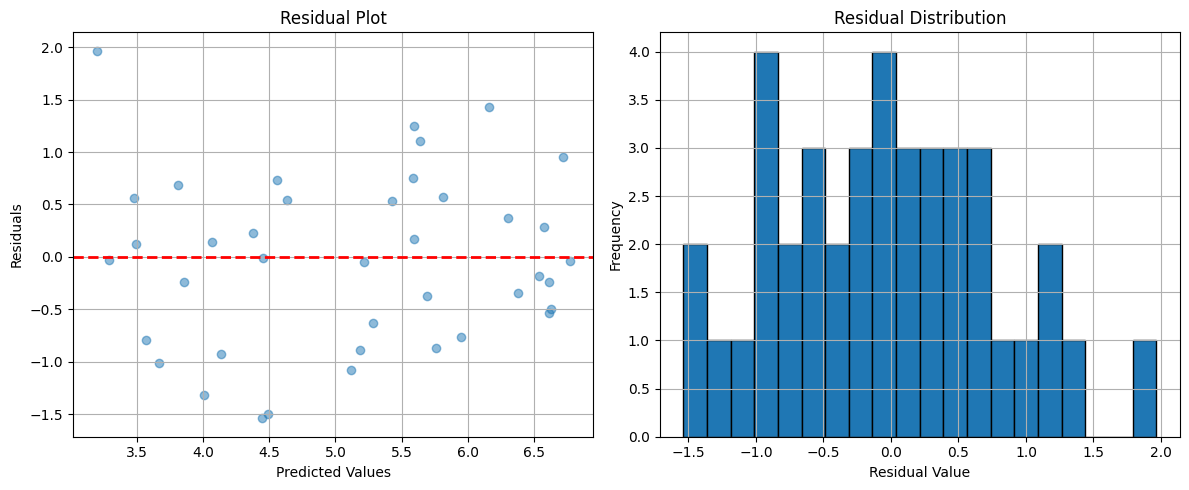

Residual statistics:
Mean: -0.0361 (should be ~0)
Std:  0.8091
Min:  -1.5388
Max:  1.9658


In [46]:
# ============================================================
# RESIDUAL ANALYSIS - DIAGNOSING YOUR MODEL
# ============================================================
# Residuals = Actual values - Predicted values = y_true - y_pred
# Analyzing residuals helps us understand:
# - Are there patterns our model is missing?
# - Are the errors random (good) or systematic (bad)?
# - Are there any outliers affecting our model?

print("\n" + "=" * 50)
print("Residual Analysis")
print("=" * 50)

# ============================================================
# Calculate Residuals
# ============================================================
# Residual = What we observed - What we predicted
# Positive residual: Model underestimated (prediction too low)
# Negative residual: Model overestimated (prediction too high)
# Zero residual: Perfect prediction!

residuals = y_test - y_test_pred  # Shape: (40, 1)
                                  # One residual for each test example

# ============================================================
# Visualize Residuals
# ============================================================
plt.figure(figsize=(12, 5))  # Create figure for two plots

# ------------------------------------------------------------
# Plot 1: Residual Plot (Residuals vs Predicted Values)
# ------------------------------------------------------------
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1

# Scatter plot: x = predicted values, y = residuals
plt.scatter(y_test_pred, residuals, alpha=0.5)
# Each point shows: for this prediction, how much error did we make?

# Draw horizontal line at y=0 (perfect predictions)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
# plt.axhline draws a horizontal line across the plot
# y=0: at residual = 0 (no error)
# color='r': red color
# linestyle='--': dashed line

plt.xlabel('Predicted Values')   # x-axis: what we predicted
plt.ylabel('Residuals')          # y-axis: our errors
plt.title('Residual Plot')
plt.grid(True)

# What to look for:
# ✓ GOOD: Random scatter around the red line (y=0)
#   - Errors are random, no systematic pattern
#   - Our linear model is appropriate
#
# ✗ BAD: Curved pattern (e.g., U-shape or rainbow)
#   - Model is missing a non-linear relationship
#   - Consider polynomial regression or other models
#
# ✗ BAD: Funnel shape (spreading out or narrowing)
#   - Heteroscedasticity (variance changes with predictions)
#   - May need to transform the data

# ------------------------------------------------------------
# Plot 2: Residual Distribution (Histogram)
# ------------------------------------------------------------
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2

# Histogram of residual values
plt.hist(residuals, bins=20, edgecolor='black')
# bins=20: divide into 20 bars
# edgecolor='black': black borders on bars

plt.xlabel('Residual Value')  # x-axis: size of error
plt.ylabel('Frequency')       # y-axis: how often this error occurs
plt.title('Residual Distribution')
plt.grid(True)

# What to look for:
# ✓ GOOD: Bell-shaped (normal distribution) centered at 0
#   - Errors are random and symmetric
#   - Model assumptions are satisfied
#
# ✗ BAD: Skewed distribution (asymmetric)
#   - Model might be biased (consistently over/under-predicting)
#
# ✗ BAD: Multiple peaks
#   - There might be subgroups in the data with different patterns

plt.tight_layout()  # Adjust spacing between plots
plt.show()

# ============================================================
# Residual Statistics
# ============================================================
print(f"Residual statistics:")
print(f"Mean: {np.mean(residuals):.4f} (should be ~0)")
# Mean ≈ 0: On average, we're not biased high or low

print(f"Std:  {np.std(residuals):.4f}")
# Standard deviation: typical error size

print(f"Min:  {np.min(residuals):.4f}")
# Worst under-prediction (most negative residual)

print(f"Max:  {np.max(residuals):.4f}")
# Worst over-prediction (most positive residual)

# Key Takeaways:
# - Residual analysis is a DIAGNOSTIC tool
# - It helps you understand if your model is appropriate
# - Random residuals = good linear model
# - Patterns in residuals = model is missing something
# - This is essential for model validation in practice!

Overfitting vs Underfitting Demonstration


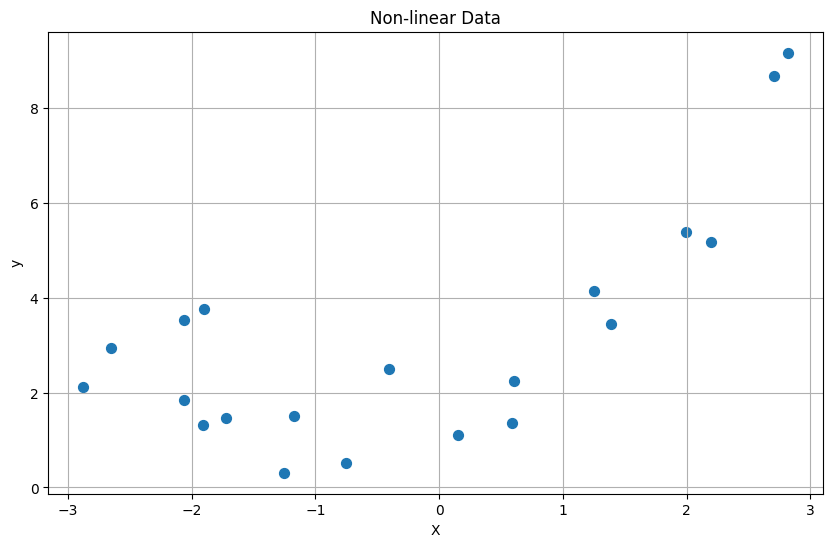

Generated 20 examples with quadratic relationship
True relationship: y = 0.5x² + x + 2 + noise


In [47]:
# ============================================================
# OVERFITTING VS UNDERFITTING - A CRUCIAL CONCEPT
# ============================================================
# One of the MOST important concepts in machine learning!
#
# UNDERFITTING: Model is too simple to capture the pattern
#   - High error on BOTH training and test data
#   - Model lacks the capacity to learn the relationship
#   - Example: Using a straight line for curved data
#
# OVERFITTING: Model is too complex and memorizes noise
#   - Low error on training data, HIGH error on test data
#   - Model learned the noise, not the true pattern
#   - Example: Using a degree-15 polynomial for simple data
#
# JUST RIGHT: Model captures the true pattern, ignores noise
#   - Low error on BOTH training and test data
#   - Model generalizes well to new data

print("=" * 60)
print("Overfitting vs Underfitting Demonstration")
print("=" * 60)

# ============================================================
# Generate Non-Linear Data (Quadratic Relationship)
# ============================================================
# We'll use a QUADRATIC (curved) relationship this time
# True relationship: y = 0.5x² + x + 2 + noise

np.random.seed(42)  # For reproducibility

m = 20  # SMALL dataset intentionally!
        # With few points, overfitting is easier to demonstrate
        # The model can "memorize" each point

# Generate x values between -3 and 3
X = 6 * np.random.rand(m, 1) - 3  # 6 * [0, 1) - 3 = [-3, 3)
                                   # Shape: (20, 1)

# Generate y values using QUADRATIC relationship (not linear!)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
# 0.5 * X²: The quadratic term (creates the curve)
# X: The linear term
# 2: The intercept
# np.random.randn(m, 1): Gaussian noise (mean=0, std=1)

# ============================================================
# Visualize the Data
# ============================================================
plt.figure(figsize=(10, 6))  # Create figure
plt.scatter(X, y, s=50)  # Plot data points
                         # s=50 sets point size
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-linear Data')
plt.grid(True)
plt.show()

print(f"Generated {m} examples with quadratic relationship")
print(f"True relationship: y = 0.5x² + x + 2 + noise")

# Notice: The data clearly forms a CURVE, not a straight line!
# A linear model won't fit this well (underfitting)
# But a too-complex model will overfit

In [48]:
# ============================================================
# INSTALL SCIKIT-LEARN
# ============================================================
# scikit-learn (sklearn) is Python's most popular ML library
# It provides ready-to-use implementations of many algorithms
# We'll use it for metrics and comparison

# Uncomment and run the line below if you need to install it:
# %pip install scikit-learn

# What scikit-learn provides:
# - LinearRegression, LogisticRegression, etc.
# - mean_squared_error, r2_score, and other metrics
# - PolynomialFeatures for creating polynomial terms
# - Cross-validation, train/test splitting, and more!


Model 1: Linear (Underfitting)


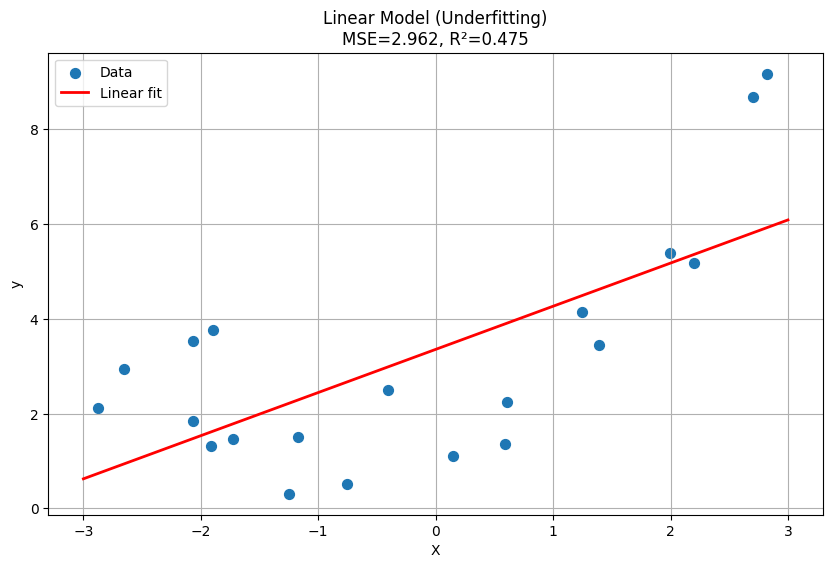

Performance:
MSE: 2.9619
R²:  0.4752

→ The line can't capture the curve! This is UNDERFITTING.


In [49]:
# ============================================================
# MODEL 1: LINEAR MODEL (UNDERFITTING EXAMPLE)
# ============================================================
# Let's try to fit a STRAIGHT LINE to our CURVED data
# This is too simple - it will UNDERFIT!

print("\n" + "=" * 60)
print("Model 1: Linear (Underfitting)")
print("=" * 60)

# Import sklearn tools for evaluation
from sklearn.linear_model import LinearRegression  # For comparison
from sklearn.preprocessing import PolynomialFeatures  # For creating x², x³, etc.
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics

# ============================================================
# Fit a Linear Model (straight line)
# ============================================================
# Model: y = θ₀ + θ₁·x (just a straight line)

# Add bias term
X_b = np.c_[np.ones((m, 1)), X]  # Shape: (20, 2)
                                 # Columns: [1, x]

# Use Normal Equation to find optimal θ
theta_linear = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# Shape: (2, 1) containing [θ₀, θ₁]

# ============================================================
# Generate Points for Plotting the Fit Line
# ============================================================
# Create smooth x values for plotting
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)  # 100 points from -3 to 3
                                                  # .reshape(-1, 1) makes it a column vector
                                                  # Shape: (100, 1)

# Add bias term for prediction
X_plot_b = np.c_[np.ones((len(X_plot), 1)), X_plot]  # Shape: (100, 2)

# Make predictions for plotting
y_plot_linear = X_plot_b.dot(theta_linear)  # Shape: (100, 1)

# ============================================================
# Evaluate the Model
# ============================================================
# Make predictions on training data
y_pred_linear = X_b.dot(theta_linear)  # Shape: (20, 1)

# Calculate metrics
mse_linear = mean_squared_error(y, y_pred_linear)  # Mean Squared Error
r2_linear = r2_score(y, y_pred_linear)  # R-squared (coefficient of determination)

# ============================================================
# Visualize the Fit
# ============================================================
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=50, label='Data')  # Original data points
plt.plot(X_plot, y_plot_linear, 'r-', linewidth=2, label='Linear fit')  # Fitted line
                                                                         # 'r-' = red solid line
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Linear Model (Underfitting)\nMSE={mse_linear:.3f}, R²={r2_linear:.3f}')
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# Analysis
# ============================================================
print(f"Performance:")
print(f"MSE: {mse_linear:.4f}")  # High error
print(f"R²:  {r2_linear:.4f}")   # Low R² (poor fit)
print("\n→ The line can't capture the curve! This is UNDERFITTING.")

# Key observation:
# The straight line cuts through the middle of the curve
# It's systematically wrong at the edges (too high) and middle (too low)
# The model is TOO SIMPLE for this data


Model 2: Quadratic (Just Right)
Original features shape: (20, 1)
With polynomial features: (20, 3)
Features: [1, x, x²]


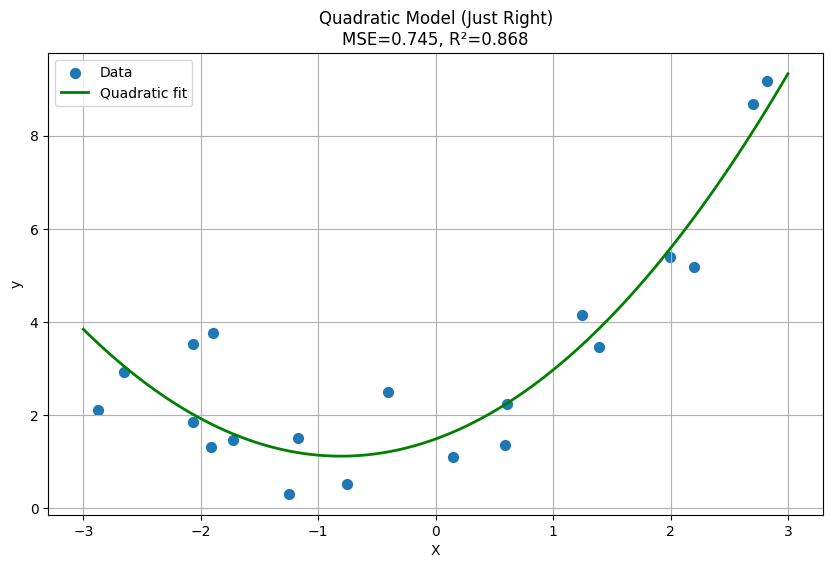

Performance:
MSE: 0.7450
R²:  0.8680

→ Much better! The curve fits the data well.


In [50]:
# ============================================================
# MODEL 2: QUADRATIC MODEL (JUST RIGHT!)
# ============================================================
# Now let's fit a QUADRATIC model to our curved data
# Since the true relationship IS quadratic, this should work perfectly!

print("\n" + "=" * 60)
print("Model 2: Quadratic (Just Right)")
print("=" * 60)

# ============================================================
# Create Polynomial Features
# ============================================================
# To fit y = θ₀ + θ₁·x + θ₂·x², we need features [1, x, x²]
# This is called "polynomial regression"

def add_polynomial_features(X, degree):
    """
    Add polynomial features up to given degree
    
    For degree=2: returns [x, x²]
    For degree=3: returns [x, x², x³]
    etc.
    
    Note: We add the bias (column of 1s) separately
    """
    X_poly = X.copy()  # Start with original x
    for d in range(2, degree + 1):  # Add x², x³, etc.
        X_poly = np.c_[X_poly, X**d]  # Concatenate new column
    return X_poly

# Create features [x, x²]
X_poly2 = add_polynomial_features(X, degree=2)  # Shape: (20, 2)

# Add bias term to get [1, x, x²]
X_poly2_b = np.c_[np.ones((m, 1)), X_poly2]  # Shape: (20, 3)

print(f"Original features shape: {X.shape}")      # (20, 1) - just x
print(f"With polynomial features: {X_poly2_b.shape}")  # (20, 3) - [1, x, x²]
print(f"Features: [1, x, x²]")

# ============================================================
# Fit the Quadratic Model
# ============================================================
# Model: y = θ₀ + θ₁·x + θ₂·x²
# This is still LINEAR REGRESSION (linear in parameters θ)!

theta_quad = np.linalg.inv(X_poly2_b.T.dot(X_poly2_b)).dot(X_poly2_b.T).dot(y)
# Shape: (3, 1) containing [θ₀, θ₁, θ₂]

# ============================================================
# Generate Points for Plotting
# ============================================================
X_plot_poly2 = add_polynomial_features(X_plot, degree=2)  # [x, x²] for plotting
X_plot_poly2_b = np.c_[np.ones((len(X_plot), 1)), X_plot_poly2]  # [1, x, x²]
y_plot_quad = X_plot_poly2_b.dot(theta_quad)  # Predictions for smooth curve

# ============================================================
# Evaluate the Model
# ============================================================
y_pred_quad = X_poly2_b.dot(theta_quad)  # Predictions on training data
mse_quad = mean_squared_error(y, y_pred_quad)  # Mean Squared Error
r2_quad = r2_score(y, y_pred_quad)  # R-squared

# ============================================================
# Visualize the Fit
# ============================================================
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=50, label='Data')  # Original data
plt.plot(X_plot, y_plot_quad, 'g-', linewidth=2, label='Quadratic fit')  # Fitted curve
                                                                          # 'g-' = green solid line
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Quadratic Model (Just Right)\nMSE={mse_quad:.3f}, R²={r2_quad:.3f}')
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# Analysis
# ============================================================
print(f"Performance:")
print(f"MSE: {mse_quad:.4f}")  # Low error!
print(f"R²:  {r2_quad:.4f}")   # High R² (good fit)
print("\n→ Much better! The curve fits the data well.")

# Key observation:
# The quadratic curve matches the true pattern!
# This is the GOLDILOCKS zone - not too simple, not too complex
# The model has the right "capacity" for this data


Model 3: Degree 15 Polynomial (Overfitting)
Features shape: (20, 16)
Features: [1, x, x², x³, ..., x¹⁵]
We have 16 parameters for only 20 data points!


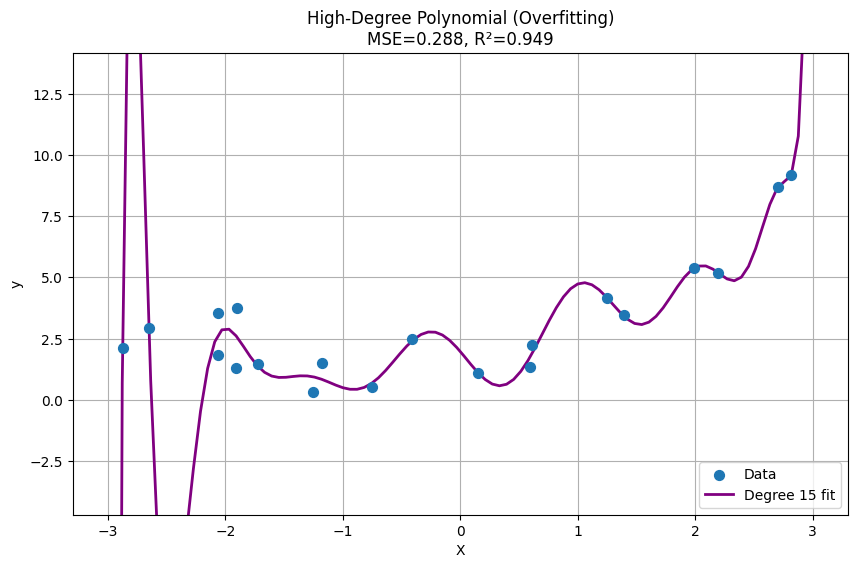

Performance:
MSE: 0.2879
R²:  0.9490

→ Perfect fit on training data, but crazy wiggles!
   This will generalize TERRIBLY to new data.


In [51]:
# ============================================================
# MODEL 3: DEGREE 15 POLYNOMIAL (OVERFITTING EXAMPLE)
# ============================================================
# Now let's go CRAZY and fit a degree 15 polynomial!
# This is way too complex for our simple quadratic data
# The model will OVERFIT - memorizing noise instead of learning patterns

print("\n" + "=" * 60)
print("Model 3: Degree 15 Polynomial (Overfitting)")
print("=" * 60)

# ============================================================
# Create MANY Polynomial Features
# ============================================================
# Features: [1, x, x², x³, x⁴, x⁵, ..., x¹⁵]
# That's 16 parameters for only 20 data points!
# Almost as many parameters as data points = recipe for overfitting

X_poly15 = add_polynomial_features(X, degree=15)  # [x, x², ..., x¹⁵]
X_poly15_b = np.c_[np.ones((m, 1)), X_poly15]  # Add bias: [1, x, x², ..., x¹⁵]
                                               # Shape: (20, 16)

print(f"Features shape: {X_poly15_b.shape}")  # (20, 16) - 16 features!
print(f"Features: [1, x, x², x³, ..., x¹⁵]")
print(f"We have {X_poly15_b.shape[1]} parameters for only {m} data points!")

# ============================================================
# Fit the High-Degree Polynomial
# ============================================================
# Model: y = θ₀ + θ₁·x + θ₂·x² + ... + θ₁₅·x¹⁵

theta_overfit = np.linalg.inv(X_poly15_b.T.dot(X_poly15_b)).dot(X_poly15_b.T).dot(y)
# Shape: (16, 1) containing [θ₀, θ₁, ..., θ₁₅]

# ============================================================
# Generate Points for Plotting
# ============================================================
X_plot_poly15 = add_polynomial_features(X_plot, degree=15)  # Polynomial features for plot
X_plot_poly15_b = np.c_[np.ones((len(X_plot), 1)), X_plot_poly15]  # Add bias
y_plot_overfit = X_plot_poly15_b.dot(theta_overfit)  # Predictions

# ============================================================
# Evaluate the Model
# ============================================================
y_pred_overfit = X_poly15_b.dot(theta_overfit)  # Predictions on training data
mse_overfit = mean_squared_error(y, y_pred_overfit)  # Mean Squared Error
r2_overfit = r2_score(y, y_pred_overfit)  # R-squared

# ============================================================
# Visualize the Fit
# ============================================================
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=50, label='Data', zorder=3)  # Original data
                                                  # zorder=3 draws points on top
plt.plot(X_plot, y_plot_overfit, 'purple', linewidth=2, label='Degree 15 fit')
# Notice the WILD oscillations between data points!

plt.xlabel('X')
plt.ylabel('y')
plt.title(f'High-Degree Polynomial (Overfitting)\nMSE={mse_overfit:.3f}, R²={r2_overfit:.3f}')
plt.legend()
plt.grid(True)
plt.ylim(y.min() - 5, y.max() + 5)  # Limit y-axis to see the data
                                     # Otherwise the wild oscillations dominate
plt.show()

# ============================================================
# Analysis
# ============================================================
print(f"Performance:")
print(f"MSE: {mse_overfit:.4f}")  # VERY low error on training data!
print(f"R²:  {r2_overfit:.4f}")   # VERY high R² (seems great, but...)
print("\n→ Perfect fit on training data, but crazy wiggles!")
print("   This will generalize TERRIBLY to new data.")

# Key observations:
# - The curve passes through (or very close to) EVERY training point
# - Between points, it oscillates wildly
# - The model has "memorized" the training data, including the NOISE
# - On new data, these oscillations will cause HUGE errors
# - This is OVERFITTING - the model is TOO COMPLEX


Side-by-Side Comparison


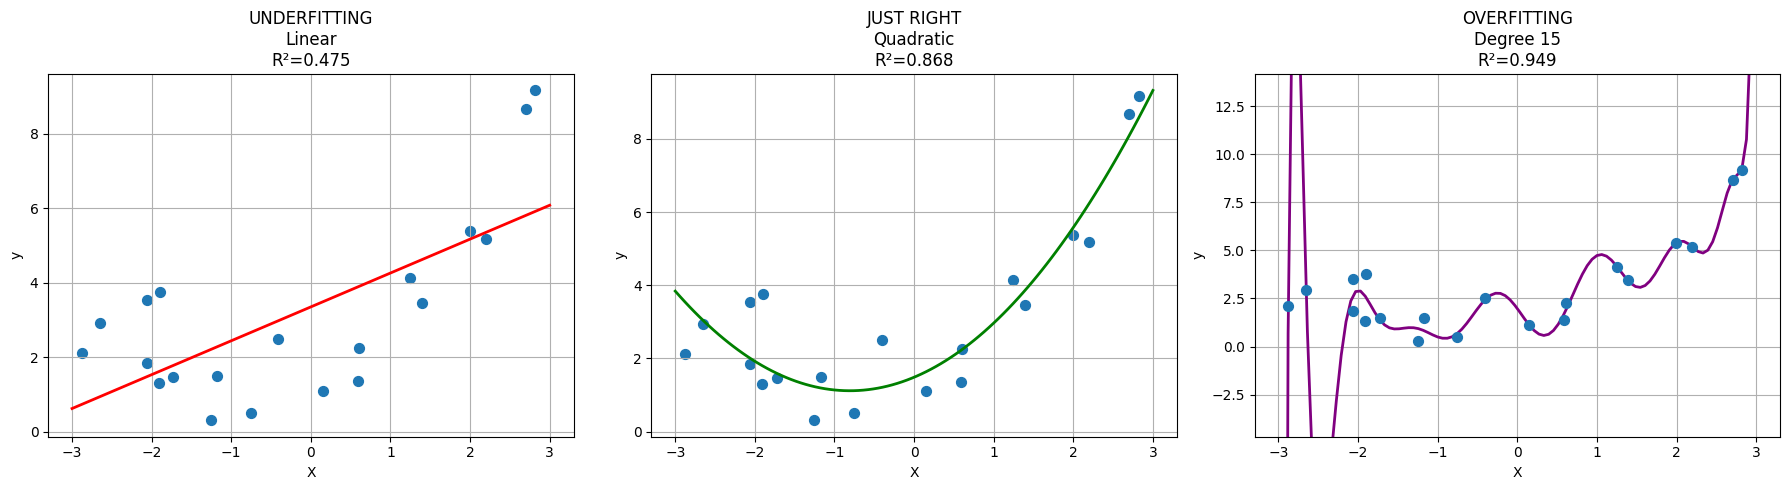


Summary (Training R² scores):
Linear (Underfit):   R² = 0.475 - Too simple!
Quadratic (Right):   R² = 0.868 - Just right!
Degree 15 (Overfit): R² = 0.949 - Memorizing noise!


In [52]:
# ============================================================
# SIDE-BY-SIDE COMPARISON OF ALL THREE MODELS
# ============================================================
# Let's compare underfitting, just right, and overfitting visually

print("\n" + "=" * 60)
print("Side-by-Side Comparison")
print("=" * 60)

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# fig: the overall figure
# axes: array of 3 axes objects [axes[0], axes[1], axes[2]]
# 1, 3: 1 row, 3 columns
# figsize=(18, 5): 18 inches wide, 5 inches tall

# ------------------------------------------------------------
# Left Plot: Linear (Underfitting)
# ------------------------------------------------------------
axes[0].scatter(X, y, s=50)  # Data points
axes[0].plot(X_plot, y_plot_linear, 'r-', linewidth=2)  # Linear fit (red)
axes[0].set_title(f'UNDERFITTING\nLinear\nR²={r2_linear:.3f}')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].grid(True)
# The straight line clearly misses the curve

# ------------------------------------------------------------
# Middle Plot: Quadratic (Just Right)
# ------------------------------------------------------------
axes[1].scatter(X, y, s=50)  # Data points
axes[1].plot(X_plot, y_plot_quad, 'g-', linewidth=2)  # Quadratic fit (green)
axes[1].set_title(f'JUST RIGHT\nQuadratic\nR²={r2_quad:.3f}')
axes[1].set_xlabel('X')
axes[1].set_ylabel('y')
axes[1].grid(True)
# The curve follows the data pattern without overfitting

# ------------------------------------------------------------
# Right Plot: Degree 15 (Overfitting)
# ------------------------------------------------------------
axes[2].scatter(X, y, s=50, zorder=3)  # Data points on top
axes[2].plot(X_plot, y_plot_overfit, 'purple', linewidth=2)  # High-degree fit (purple)
axes[2].set_title(f'OVERFITTING\nDegree 15\nR²={r2_overfit:.3f}')
axes[2].set_xlabel('X')
axes[2].set_ylabel('y')
axes[2].grid(True)
axes[2].set_ylim(y.min() - 5, y.max() + 5)  # Limit y-axis
# Wild oscillations - the model is memorizing noise

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# ============================================================
# Summary Statistics
# ============================================================
print("\nSummary (Training R² scores):")
print(f"Linear (Underfit):   R² = {r2_linear:.3f} - Too simple!")
print(f"Quadratic (Right):   R² = {r2_quad:.3f} - Just right!")
print(f"Degree 15 (Overfit): R² = {r2_overfit:.3f} - Memorizing noise!")

# Key insight:
# On TRAINING data, the overfit model looks best (highest R²)
# But this is deceiving! We need to test on NEW data...

In [53]:
# ============================================================
# THE REAL TEST: PERFORMANCE ON NEW (UNSEEN) DATA
# ============================================================
# This is the CRITICAL experiment!
# On training data, the overfit model looks best
# But how do they perform on data they've NEVER seen?

print("\n" + "=" * 60)
print("The REAL Test: Performance on New Data")
print("=" * 60)

# ============================================================
# Generate COMPLETELY NEW Test Data
# ============================================================
# Same relationship (y = 0.5x² + x + 2 + noise)
# But DIFFERENT random points the models have never seen

np.random.seed(100)  # Different seed for new random data!

m_test = 50  # More test examples for reliable evaluation

# Generate new x values
X_test = 6 * np.random.rand(m_test, 1) - 3  # Range: [-3, 3]

# Generate new y values from the TRUE relationship
y_test = 0.5 * X_test**2 + X_test + 2 + np.random.randn(m_test, 1)
# Same formula: y = 0.5x² + x + 2 + noise

# ============================================================
# Prepare Features for All Three Models
# ============================================================
# Each model needs its own feature representation

# Linear model: [1, x]
X_test_b = np.c_[np.ones((m_test, 1)), X_test]  # Shape: (50, 2)

# Quadratic model: [1, x, x²]
X_test_poly2 = add_polynomial_features(X_test, degree=2)
X_test_poly2_b = np.c_[np.ones((m_test, 1)), X_test_poly2]  # Shape: (50, 3)

# Degree 15 model: [1, x, x², ..., x¹⁵]
X_test_poly15 = add_polynomial_features(X_test, degree=15)
X_test_poly15_b = np.c_[np.ones((m_test, 1)), X_test_poly15]  # Shape: (50, 16)

# ============================================================
# Make Predictions on Test Set
# ============================================================
# Using the thetas we learned from training data

y_test_pred_linear = X_test_b.dot(theta_linear)  # Linear predictions
y_test_pred_quad = X_test_poly2_b.dot(theta_quad)  # Quadratic predictions
y_test_pred_overfit = X_test_poly15_b.dot(theta_overfit)  # Degree 15 predictions

# ============================================================
# Evaluate All Models on Test Set
# ============================================================
# MSE and R² on NEW data

test_mse_linear = mean_squared_error(y_test, y_test_pred_linear)
test_mse_quad = mean_squared_error(y_test, y_test_pred_quad)
test_mse_overfit = mean_squared_error(y_test, y_test_pred_overfit)

test_r2_linear = r2_score(y_test, y_test_pred_linear)
test_r2_quad = r2_score(y_test, y_test_pred_quad)
test_r2_overfit = r2_score(y_test, y_test_pred_overfit)

# ============================================================
# Compare Training vs Test Performance
# ============================================================
print("\nTRAINING SET Performance (what we saw before):")
print(f"Linear:    MSE={mse_linear:.4f}, R²={r2_linear:.4f}")
print(f"Quadratic: MSE={mse_quad:.4f}, R²={r2_quad:.4f}")
print(f"Degree 15: MSE={mse_overfit:.4f}, R²={r2_overfit:.4f}")  # Best on training!

print("\nTEST SET Performance (NEW, UNSEEN DATA):")
print(f"Linear:    MSE={test_mse_linear:.4f}, R²={test_r2_linear:.4f}")
print(f"Quadratic: MSE={test_mse_quad:.4f}, R²={test_r2_quad:.4f}")  # Best on test!
print(f"Degree 15: MSE={test_mse_overfit:.4f}, R²={test_r2_overfit:.4f}")  # TERRIBLE!

# ============================================================
# KEY INSIGHT
# ============================================================
print("\n" + "=" * 60)
print("KEY INSIGHT:")
print("=" * 60)
print("Degree 15 had BEST training performance but WORST test performance!")
print("This is the hallmark of OVERFITTING.")
print("\nQuadratic model generalizes best - it learned the true pattern!")

# What we learned:
# - Training performance can be DECEIVING
# - A model that "memorizes" training data (high training R²) may fail on new data
# - The QUADRATIC model is best because:
#   * It matches the true underlying relationship
#   * It's complex enough to capture the pattern
#   * It's simple enough not to memorize noise
# - Always evaluate on TEST data to detect overfitting!
# - The gap between train and test performance indicates overfitting severity


The REAL Test: Performance on New Data

TRAINING SET Performance (what we saw before):
Linear:    MSE=2.9619, R²=0.4752
Quadratic: MSE=0.7450, R²=0.8680
Degree 15: MSE=0.2879, R²=0.9490

TEST SET Performance (NEW, UNSEEN DATA):
Linear:    MSE=2.8142, R²=0.5177
Quadratic: MSE=1.0781, R²=0.8152
Degree 15: MSE=734.4586, R²=-124.8674

KEY INSIGHT:
Degree 15 had BEST training performance but WORST test performance!
This is the hallmark of OVERFITTING.

Quadratic model generalizes best - it learned the true pattern!


K-Fold Cross-Validation
Testing different polynomial degrees with 5-fold CV:

Degree  1: MSE = 3.0550 ± 0.3563
Degree  2: MSE = 0.8499 ± 0.1926
Degree  3: MSE = 0.8748 ± 0.2409
Degree  4: MSE = 0.9036 ± 0.2343
Degree  5: MSE = 0.9250 ± 0.2444
Degree  6: MSE = 0.9480 ± 0.2598
Degree  7: MSE = 0.9666 ± 0.2661
Degree  8: MSE = 0.9872 ± 0.2757
Degree  9: MSE = 1.0615 ± 0.2974
Degree 10: MSE = 1.0721 ± 0.2350

→ Best degree: 2 (lowest CV error)


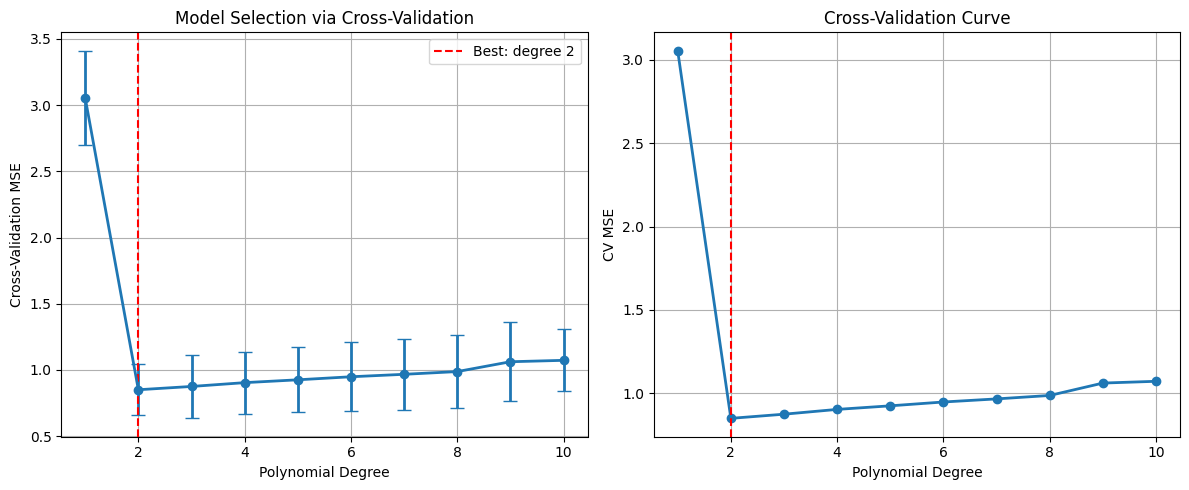

In [54]:
# ============================================================
# K-FOLD CROSS-VALIDATION
# ============================================================
# Cross-validation is a technique to evaluate model performance
# more reliably than a single train/test split.
#
# Why use it?
# - A single train/test split can be "lucky" or "unlucky"
# - CV uses ALL data for both training and validation
# - Gives a more stable estimate of model performance
# ============================================================

print("=" * 60)
print("K-Fold Cross-Validation")
print("=" * 60)

# ============================================================
# GENERATE DATA
# ============================================================
np.random.seed(42)          # Set seed for reproducibility
m = 100                     # Number of samples
X_cv = 6 * np.random.rand(m, 1) - 3    # X values from -3 to 3
# True function: y = 0.5x² + x + 2 (quadratic)
y_cv = 0.5 * X_cv**2 + X_cv + 2 + np.random.randn(m, 1)  # Add noise

# ============================================================
# K-FOLD CROSS-VALIDATION FUNCTION
# ============================================================
def k_fold_cross_validation(X, y, degree, k=5):
    """
    Perform k-fold cross-validation
    
    How K-Fold CV Works:
    ====================
    1. Split data into k equal parts (called "folds")
    2. For each fold i from 1 to k:
       - Use fold i as the validation set
       - Use all other folds (k-1 folds) as training set
       - Train model on training set
       - Evaluate on validation set
       - Record the error
    3. Average all k errors to get final CV score
    
    Example with k=5:
    -----------------
    Round 1: [VAL][Train][Train][Train][Train]
    Round 2: [Train][VAL][Train][Train][Train]
    Round 3: [Train][Train][VAL][Train][Train]
    Round 4: [Train][Train][Train][VAL][Train]
    Round 5: [Train][Train][Train][Train][VAL]
    
    Each data point is used for validation exactly once!
    """
    m = len(X)                    # Total number of samples
    fold_size = m // k            # Size of each fold (100 // 5 = 20)
    mse_scores = []               # Store MSE from each fold
    
    # --------------------------------------------------------
    # ITERATE THROUGH EACH FOLD
    # --------------------------------------------------------
    for fold in range(k):         # fold = 0, 1, 2, 3, 4
        # Calculate validation set boundaries
        val_start = fold * fold_size      # Start index of validation fold
        val_end = (fold + 1) * fold_size  # End index of validation fold
        # Example: fold=0 → val_start=0, val_end=20
        #          fold=1 → val_start=20, val_end=40
        #          fold=2 → val_start=40, val_end=60
        
        # ----------------------------------------------------
        # SPLIT DATA INTO VALIDATION AND TRAINING SETS
        # ----------------------------------------------------
        # Validation set: the current fold
        X_val = X[val_start:val_end]      # 20 samples for validation
        y_val = y[val_start:val_end]
        
        # Training set: everything EXCEPT the validation fold
        # np.vstack stacks arrays vertically (row-wise)
        X_train = np.vstack([X[:val_start], X[val_end:]])  # 80 samples
        y_train = np.vstack([y[:val_start], y[val_end:]])
        # For fold=2: X_train = [X[0:40], X[60:100]] = 80 samples
        
        # ----------------------------------------------------
        # PREPARE FEATURES (POLYNOMIAL + BIAS)
        # ----------------------------------------------------
        # Add polynomial features to training set
        X_train_poly = add_polynomial_features(X_train, degree)
        X_train_poly_b = np.c_[np.ones((len(X_train), 1)), X_train_poly]
        
        # Add polynomial features to validation set (same transformation!)
        X_val_poly = add_polynomial_features(X_val, degree)
        X_val_poly_b = np.c_[np.ones((len(X_val), 1)), X_val_poly]
        
        # ----------------------------------------------------
        # TRAIN MODEL (Normal Equation)
        # ----------------------------------------------------
        # θ = (XᵀX)⁻¹Xᵀy
        theta = np.linalg.inv(X_train_poly_b.T.dot(X_train_poly_b)).dot(X_train_poly_b.T).dot(y_train)
        
        # ----------------------------------------------------
        # VALIDATE MODEL
        # ----------------------------------------------------
        y_val_pred = X_val_poly_b.dot(theta)          # Predictions on validation set
        mse = mean_squared_error(y_val, y_val_pred)   # Calculate MSE
        mse_scores.append(mse)                        # Store this fold's MSE
    
    # Return mean and standard deviation of MSE across all folds
    # Mean = average performance
    # Std = how stable/consistent the performance is
    return np.mean(mse_scores), np.std(mse_scores)

# ============================================================
# TEST DIFFERENT POLYNOMIAL DEGREES
# ============================================================
# We'll use CV to find the best polynomial degree
# This is called "hyperparameter tuning" or "model selection"
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Degrees to test
cv_means = []    # Store mean CV error for each degree
cv_stds = []     # Store std of CV error for each degree

print("Testing different polynomial degrees with 5-fold CV:\n")
for degree in degrees:
    # Run 5-fold CV for this polynomial degree
    mean_mse, std_mse = k_fold_cross_validation(X_cv, y_cv, degree, k=5)
    cv_means.append(mean_mse)
    cv_stds.append(std_mse)
    # Print results: MSE ± standard deviation
    print(f"Degree {degree:2d}: MSE = {mean_mse:.4f} ± {std_mse:.4f}")

# ============================================================
# FIND THE BEST DEGREE
# ============================================================
# Best degree = one with lowest CV error
best_degree = degrees[np.argmin(cv_means)]  # np.argmin returns index of minimum
print(f"\n→ Best degree: {best_degree} (lowest CV error)")

# ============================================================
# VISUALIZE RESULTS
# ============================================================
plt.figure(figsize=(12, 5))

# Plot 1: CV error with error bars (showing uncertainty)
plt.subplot(1, 2, 1)
# errorbar shows mean with standard deviation as error bars
plt.errorbar(degrees, cv_means, yerr=cv_stds, marker='o', linewidth=2, capsize=5)
plt.xlabel('Polynomial Degree')
plt.ylabel('Cross-Validation MSE')
plt.title('Model Selection via Cross-Validation')
plt.axvline(x=best_degree, color='r', linestyle='--', label=f'Best: degree {best_degree}')
plt.legend()
plt.grid(True)

# Plot 2: Simple CV curve (without error bars)
plt.subplot(1, 2, 2)
plt.plot(degrees, cv_means, 'o-', linewidth=2)
plt.xlabel('Polynomial Degree')
plt.ylabel('CV MSE')
plt.title('Cross-Validation Curve')
plt.axvline(x=best_degree, color='r', linestyle='--')
plt.grid(True)

plt.tight_layout()
plt.show()

# ============================================================
# KEY TAKEAWAYS:
# ============================================================
# 1. MSE decreases as degree increases (initially) - model fits better
# 2. Reaches a minimum around degree 2-3 (the true function is quadratic!)
# 3. Then MSE increases again - overfitting to noise
# 4. The "sweet spot" is where CV error is lowest
# 5. This curve is called the "validation curve"
# ============================================================


Ridge Regression (L2 Regularization)
Using degree 15 polynomial (16 parameters total)
Training samples: 20


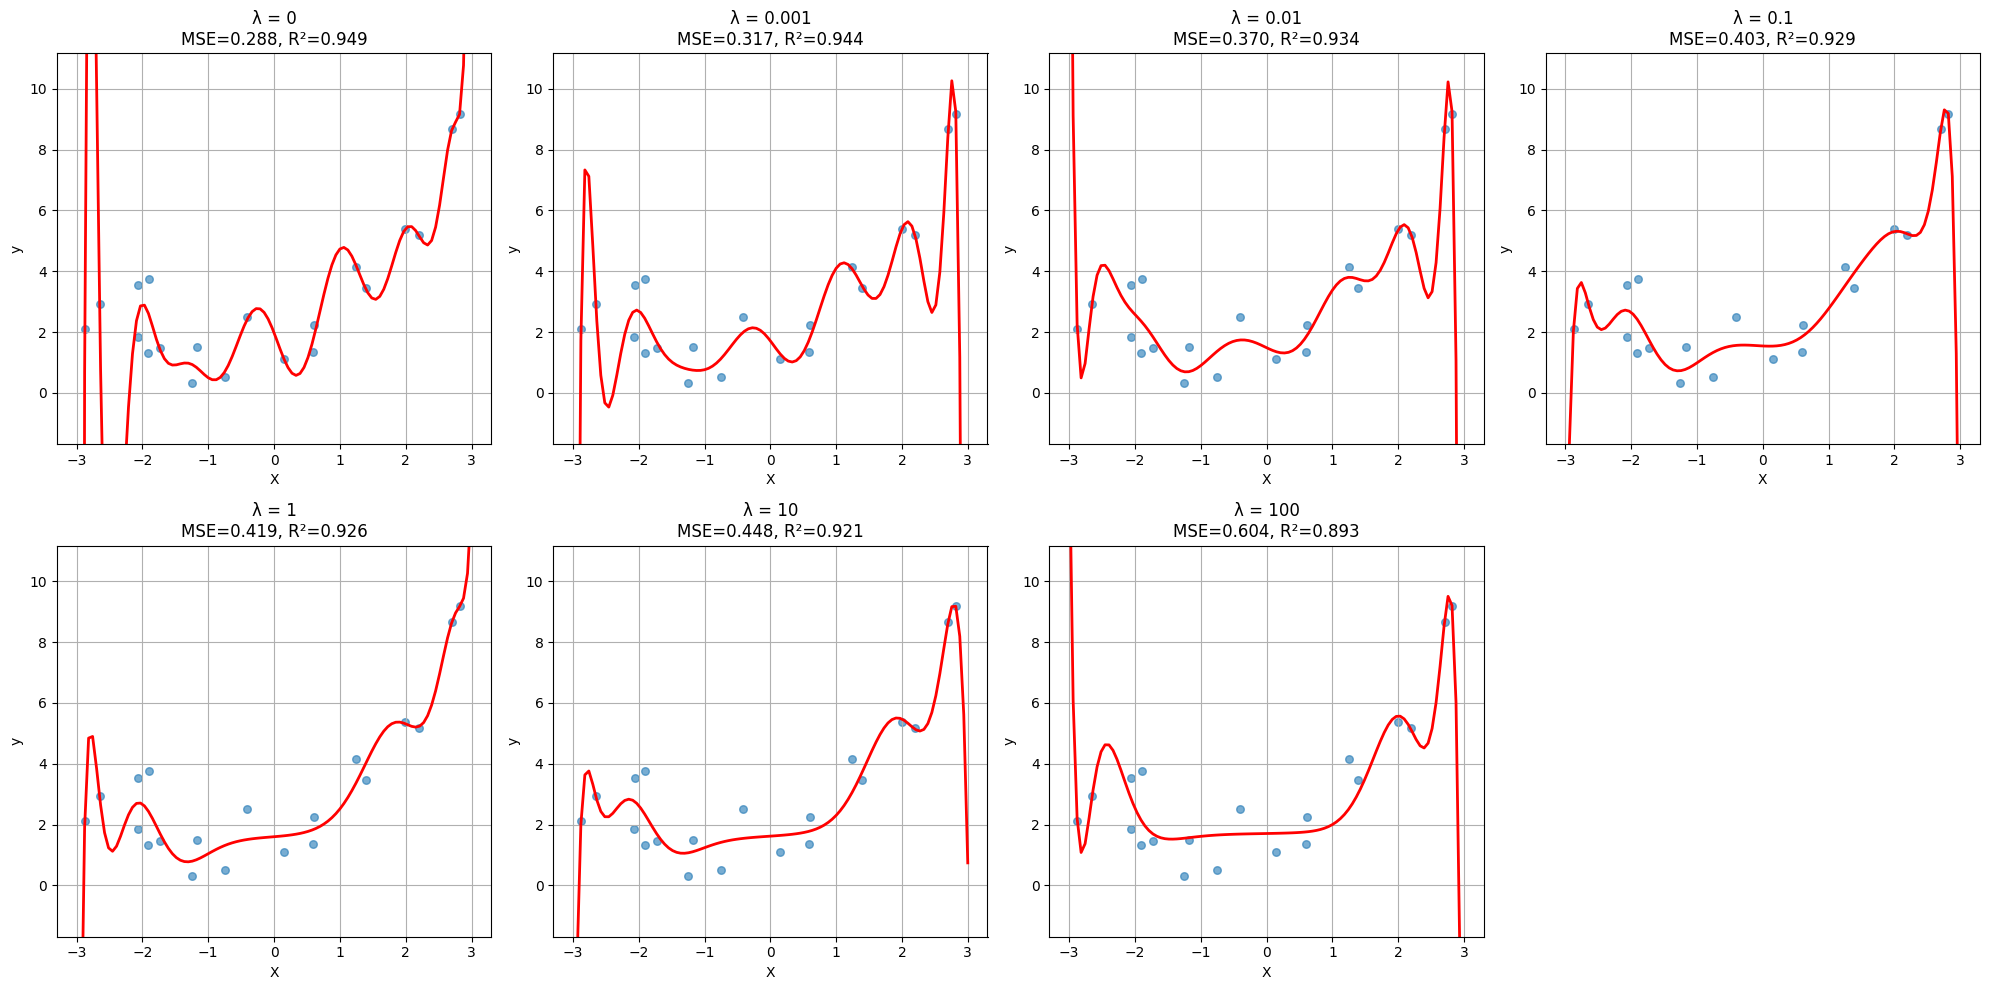


Observations:
λ = 0:    No regularization → wild oscillations (OVERFITTING)
λ = 0.01: Light regularization → smoother curve
λ = 1:    Moderate regularization → very smooth, good fit
λ = 100:  Too much regularization → almost linear (UNDERFITTING)

Key insight: Regularization is a knob to control model complexity!
Find the λ that balances fitting the data vs. staying smooth.


In [55]:
# ============================================================
# RIDGE REGRESSION (L2 REGULARIZATION)
# ============================================================
# Regularization is a technique to PREVENT OVERFITTING
# Instead of just minimizing error, we also penalize large parameter values
#
# Ridge Regression adds L2 penalty: minimize J(θ) + λ||θ||²
# Where λ (lambda) controls the strength of regularization:
#   - λ = 0: No regularization (same as normal regression)
#   - λ small: Light regularization (slight smoothing)
#   - λ large: Strong regularization (very smooth, may underfit)

print("\n" + "=" * 60)
print("Ridge Regression (L2 Regularization)")
print("=" * 60)

# ============================================================
# Ridge Regression Implementation
# ============================================================
def ridge_regression(X, y, lambda_reg):
    """
    Ridge Regression with L2 regularization
    
    Normal Equation with regularization:
    θ = (XᵀX + λI)⁻¹Xᵀy
    
    The λI term shrinks the parameters towards zero,
    which prevents overfitting by discouraging extreme values.
    
    Args:
        X: Feature matrix with bias, shape (m, n)
        y: Target values, shape (m, 1)
        lambda_reg: Regularization strength (λ)
    
    Returns:
        theta: Regularized parameters, shape (n, 1)
    """
    m, n = X.shape  # m = samples, n = features
    
    # Create identity matrix for regularization term λI
    I = np.eye(n)  # n×n identity matrix
    
    # IMPORTANT: Don't regularize the bias term (θ₀)!
    # We only want to penalize the feature weights, not the intercept
    I[0, 0] = 0  # Set first diagonal element to 0
    
    # Solve: θ = (XᵀX + λI)⁻¹Xᵀy
    theta = np.linalg.inv(X.T.dot(X) + lambda_reg * I).dot(X.T).dot(y)
    return theta

# ============================================================
# Setup: Use High-Degree Polynomial (prone to overfitting)
# ============================================================
# We'll use the same X, y data from the overfitting demo (20 points)
# With degree 15 polynomial features

degree = 15  # High degree = many parameters = prone to overfitting

# Create polynomial features for training data
# Note: Using len(X) instead of m to get correct size
X_poly = add_polynomial_features(X, degree)  # Shape: (20, 15) - [x, x², ..., x¹⁵]
X_poly_b = np.c_[np.ones((len(X), 1)), X_poly]  # Shape: (20, 16) - add bias column

print(f"Using degree {degree} polynomial ({X_poly_b.shape[1]} parameters total)")
print(f"Training samples: {len(X)}")

# ============================================================
# Try Different Regularization Strengths
# ============================================================
# We'll compare λ = 0 (no regularization) to various λ values

lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100]
# λ = 0: No regularization (will overfit)
# λ = 0.001 to 0.1: Light to moderate regularization
# λ = 1 to 10: Strong regularization
# λ = 100: Very strong regularization (may underfit)

# Create subplot grid: 2 rows, 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # Flatten to 1D array for easy indexing
                       # axes[0], axes[1], ..., axes[7]

# Loop through each regularization strength
for idx, lambda_reg in enumerate(lambdas):
    # Train ridge regression with this λ value
    theta_ridge = ridge_regression(X_poly_b, y, lambda_reg)
    
    # Generate smooth curve for plotting
    X_plot_poly = add_polynomial_features(X_plot, degree)  # Features for plot points
    X_plot_poly_b = np.c_[np.ones((len(X_plot), 1)), X_plot_poly]  # Add bias
    y_plot_ridge = X_plot_poly_b.dot(theta_ridge)  # Predictions for smooth curve
    
    # Evaluate on training data
    y_pred = X_poly_b.dot(theta_ridge)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Plot this model
    axes[idx].scatter(X, y, s=30, alpha=0.6)  # Training data
    axes[idx].plot(X_plot, y_plot_ridge, 'r-', linewidth=2)  # Fitted curve
    axes[idx].set_title(f'λ = {lambda_reg}\nMSE={mse:.3f}, R²={r2:.3f}')
    axes[idx].set_xlabel('X')
    axes[idx].set_ylabel('y')
    axes[idx].grid(True)
    axes[idx].set_ylim(y.min() - 2, y.max() + 2)  # Consistent y-axis

# Hide the last subplot (we only have 7 plots for 8 subplots)
axes[-1].axis('off')

plt.tight_layout()  # Adjust spacing
plt.show()

# ============================================================
# Observations
# ============================================================
print("\nObservations:")
print("λ = 0:    No regularization → wild oscillations (OVERFITTING)")
print("λ = 0.01: Light regularization → smoother curve")
print("λ = 1:    Moderate regularization → very smooth, good fit")
print("λ = 100:  Too much regularization → almost linear (UNDERFITTING)")
print("\nKey insight: Regularization is a knob to control model complexity!")
print("Find the λ that balances fitting the data vs. staying smooth.")


How Regularization Affects Parameters


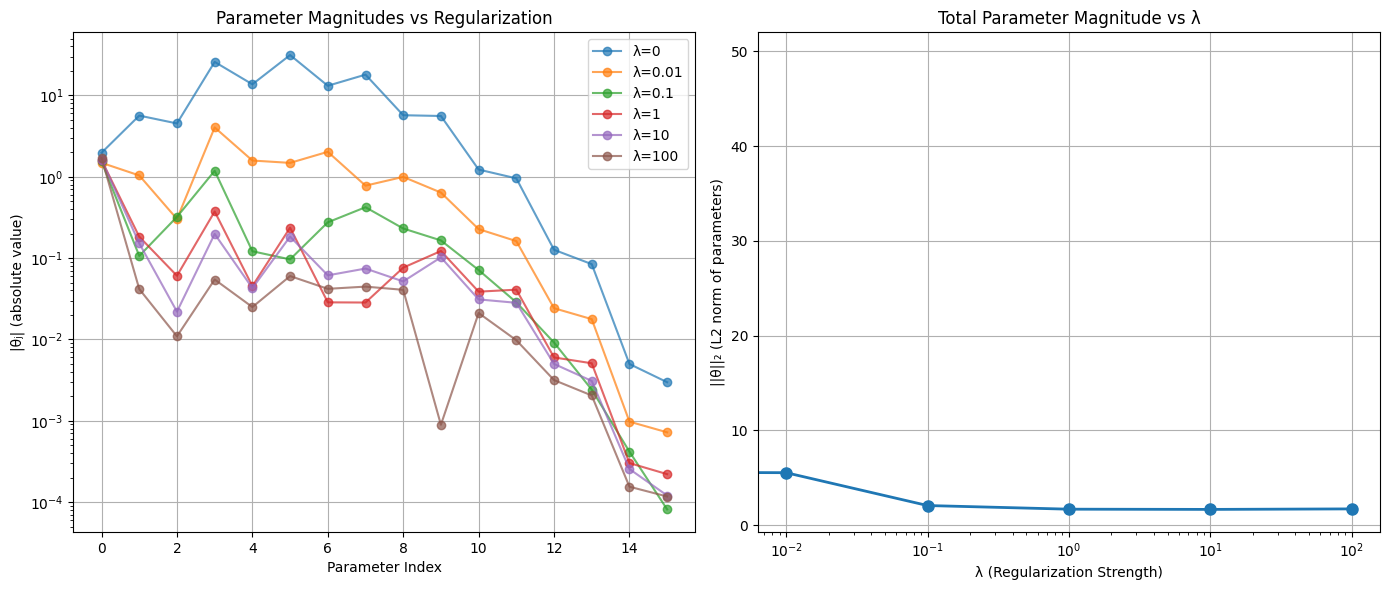


Key Insight:
As λ increases → parameter values shrink → model becomes simpler


In [56]:
# ============================================================
# HOW REGULARIZATION AFFECTS PARAMETERS
# ============================================================
# This cell shows the KEY insight about regularization:
# As λ increases → parameter values SHRINK → model becomes SIMPLER
#
# Why does this help?
# - Large parameters = model is very sensitive to small input changes
# - Small parameters = model is more stable and generalizes better
# ============================================================

print("\n" + "=" * 60)
print("How Regularization Affects Parameters")
print("=" * 60)

# ============================================================
# TEST DIFFERENT λ VALUES
# ============================================================
# Test a range of regularization strengths from 0 (no regularization) to 100 (heavy)
lambdas_test = [0, 0.01, 0.1, 1, 10, 100]
theta_values = []  # Store theta for each λ

# Train Ridge Regression with each λ value
for lambda_reg in lambdas_test:
    theta_ridge = ridge_regression(X_poly_b, y, lambda_reg)  # Train model
    theta_values.append(theta_ridge.flatten())  # Store (flatten to 1D for plotting)

# ============================================================
# VISUALIZE PARAMETER SHRINKAGE
# ============================================================
plt.figure(figsize=(14, 6))

# ------------------------------------------------------------
# PLOT 1: Individual Parameter Magnitudes
# ------------------------------------------------------------
# Shows how each θⱼ shrinks as λ increases
plt.subplot(1, 2, 1)
for i, lambda_reg in enumerate(lambdas_test):
    # Plot absolute value of each parameter (θ₀, θ₁, θ₂, ...)
    plt.plot(range(len(theta_values[i])), np.abs(theta_values[i]), 
             'o-', label=f'λ={lambda_reg}', alpha=0.7)
plt.xlabel('Parameter Index')          # x-axis: which parameter (θ₀, θ₁, θ₂, ...)
plt.ylabel('|θⱼ| (absolute value)')    # y-axis: magnitude of parameter
plt.title('Parameter Magnitudes vs Regularization')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Log scale because values span many orders of magnitude

# ------------------------------------------------------------
# PLOT 2: Total Parameter Magnitude (L2 Norm)
# ------------------------------------------------------------
# The L2 norm ||θ||₂ = √(θ₁² + θ₂² + ... + θₙ²)
# This measures the TOTAL "size" of all parameters combined
plt.subplot(1, 2, 2)
# Calculate L2 norm for each set of parameters
l2_norms = [np.linalg.norm(theta) for theta in theta_values]
plt.plot(lambdas_test, l2_norms, 'o-', linewidth=2, markersize=8)
plt.xlabel('λ (Regularization Strength)')
plt.ylabel('||θ||₂ (L2 norm of parameters)')
plt.title('Total Parameter Magnitude vs λ')
plt.xscale('log')  # Log scale for λ since we test 0.01, 0.1, 1, 10, 100
plt.grid(True)

plt.tight_layout()
plt.show()

# ============================================================
# KEY INSIGHT
# ============================================================
print("\nKey Insight:")
print("As λ increases → parameter values shrink → model becomes simpler")

# ============================================================
# WHY THIS MATTERS:
# ============================================================
# λ = 0:   Parameters can be HUGE → model is complex, may overfit
# λ = 100: Parameters are TINY → model is simple, may underfit
# λ = "just right": Parameters are controlled → good generalization
#
# Notice in the plots:
# - λ=0 (no regularization): Some parameters are very large (10³ or more!)
# - λ=100: All parameters are small (close to 0)
# - The L2 norm clearly decreases as λ increases
# ============================================================


Finding Best λ via Cross-Validation
Testing different λ values...

Best λ: 100.0000 (lowest CV error: 2902.3566)


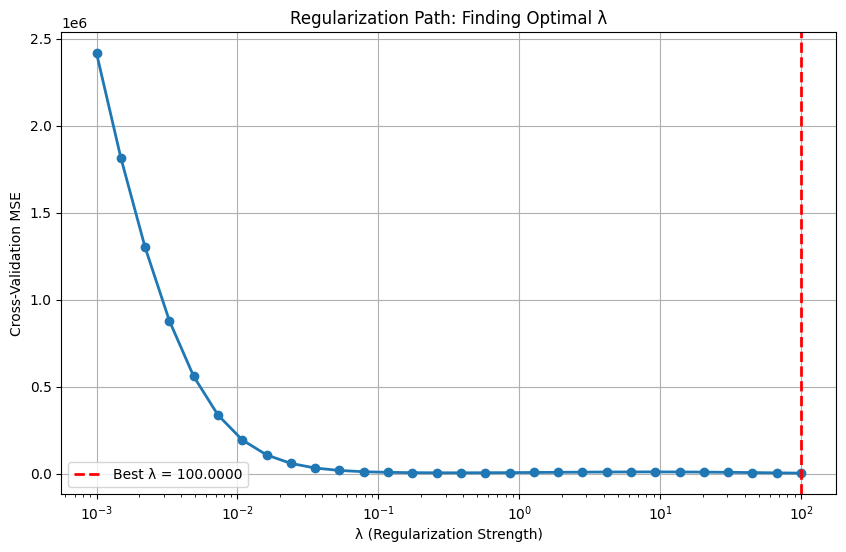

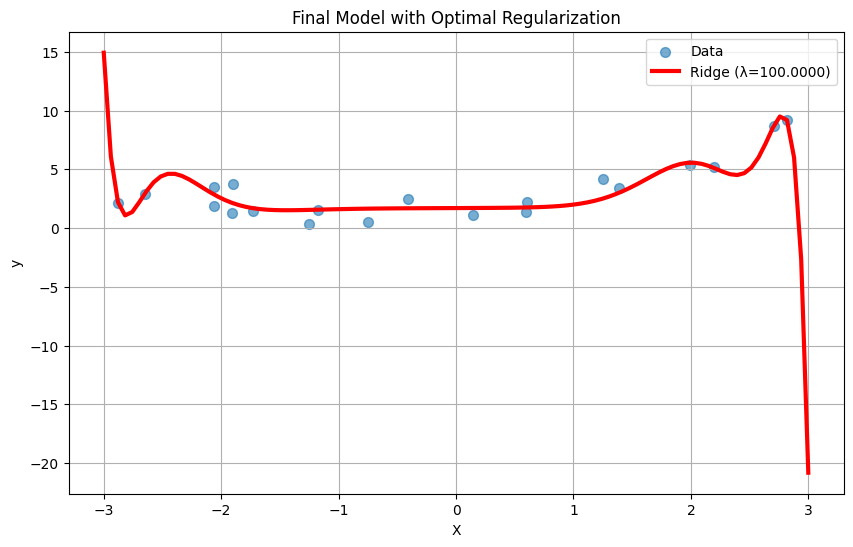

In [57]:
# ============================================================
# FINDING THE BEST λ VIA CROSS-VALIDATION
# ============================================================
# We've seen that λ controls model complexity.
# But how do we choose the RIGHT value of λ?
# Answer: Use cross-validation to find the λ that minimizes CV error!
#
# This process is called "hyperparameter tuning"
# ============================================================

print("\n" + "=" * 60)
print("Finding Best λ via Cross-Validation")
print("=" * 60)

# ============================================================
# CROSS-VALIDATION FUNCTION FOR RIDGE REGRESSION
# ============================================================
def cv_ridge(X, y, lambda_reg, k=5):
    """
    Cross-validation specifically for Ridge Regression
    
    Same as k_fold_cross_validation, but uses ridge_regression
    with the specified lambda_reg value
    """
    m = len(X)                    # Number of samples
    fold_size = m // k            # Samples per fold
    mse_scores = []               # Store MSE from each fold
    
    for fold in range(k):
        # Define validation set boundaries
        val_start = fold * fold_size
        val_end = (fold + 1) * fold_size
        
        # Split into validation and training sets
        X_val = X[val_start:val_end]
        y_val = y[val_start:val_end]
        X_train = np.vstack([X[:val_start], X[val_end:]])
        y_train = np.vstack([y[:val_start], y[val_end:]])
        
        # Train Ridge Regression with this λ
        theta = ridge_regression(X_train, y_train, lambda_reg)
        
        # Evaluate on validation set
        y_val_pred = X_val.dot(theta)
        mse = mean_squared_error(y_val, y_val_pred)
        mse_scores.append(mse)
    
    return np.mean(mse_scores)  # Return average MSE across folds

# ============================================================
# SEARCH OVER MANY λ VALUES
# ============================================================
# np.logspace creates values spaced evenly on a LOG scale
# logspace(-3, 2, 30) creates 30 values from 10⁻³ to 10²
# That's 0.001, 0.00158, 0.00251, ..., 63.1, 100
lambdas = np.logspace(-3, 2, 30)  # 30 values from 0.001 to 100
cv_errors = []                    # Store CV error for each λ

print("Testing different λ values...\n")
# Test each λ value using 5-fold cross-validation
for lambda_reg in lambdas:
    cv_error = cv_ridge(X_poly_b, y, lambda_reg, k=5)
    cv_errors.append(cv_error)

# ============================================================
# FIND THE BEST λ
# ============================================================
# Best λ = one that minimizes cross-validation error
best_lambda = lambdas[np.argmin(cv_errors)]  # λ with lowest CV error
print(f"Best λ: {best_lambda:.4f} (lowest CV error: {min(cv_errors):.4f})")

# ============================================================
# PLOT: REGULARIZATION PATH
# ============================================================
# This shows how CV error changes with λ
plt.figure(figsize=(10, 6))
plt.plot(lambdas, cv_errors, 'o-', linewidth=2)
plt.axvline(x=best_lambda, color='r', linestyle='--', linewidth=2, 
            label=f'Best λ = {best_lambda:.4f}')
plt.xlabel('λ (Regularization Strength)')
plt.ylabel('Cross-Validation MSE')
plt.title('Regularization Path: Finding Optimal λ')
plt.xscale('log')  # Log scale because λ spans several orders of magnitude
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# TRAIN FINAL MODEL WITH BEST λ
# ============================================================
# Now that we know the best λ, train the final model on ALL data
theta_best_ridge = ridge_regression(X_poly_b, y, best_lambda)

# ============================================================
# VISUALIZE THE FINAL MODEL
# ============================================================
# Create smooth curve for plotting
X_plot_poly = add_polynomial_features(X_plot, degree)  # Add polynomial features
X_plot_poly_b = np.c_[np.ones((len(X_plot), 1)), X_plot_poly]  # Add bias
y_plot_best = X_plot_poly_b.dot(theta_best_ridge)  # Predictions

plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=50, alpha=0.6, label='Data')
plt.plot(X_plot, y_plot_best, 'r-', linewidth=3, label=f'Ridge (λ={best_lambda:.4f})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Final Model with Optimal Regularization')
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# KEY TAKEAWAYS:
# ============================================================
# 1. We tested 30 different λ values from 0.001 to 100
# 2. For each λ, we used 5-fold CV to estimate generalization error
# 3. The best λ is the one with LOWEST CV error
# 4. Too small λ: underfitting (high CV error on left)
# 5. Too large λ: overfitting controlled but model too simple (high error on right)
# 6. Optimal λ: balances complexity and generalization (lowest point on curve)
# ============================================================

In [58]:
# ============================================================
# THE BIAS-VARIANCE TRADEOFF
# ============================================================
# This is one of the MOST IMPORTANT concepts in machine learning!
# It explains WHY models overfit or underfit, and how to fix it.
# ============================================================

print("\n" + "=" * 60)
print("The Bias-Variance Tradeoff")
print("=" * 60)

print("""
============================================================
BIAS (Underfitting):
============================================================
- Model is TOO SIMPLE to capture the true pattern
- Makes SYSTEMATIC errors (consistently wrong in the same way)
- Example: Fitting a line to quadratic data

Symptoms:
- High training error (can't even fit training data well)
- High test error
- Training error ≈ Test error (both are bad!)

Causes:
- Model too simple (e.g., linear model for non-linear data)
- Not enough features
- Too much regularization (λ too high)

============================================================
VARIANCE (Overfitting):
============================================================
- Model is TOO COMPLEX
- Memorizes training data including NOISE
- Very sensitive to which specific data points are in training set

Symptoms:
- Low training error (fits training data perfectly)
- High test error (fails on new data)
- Large GAP between training and test error

Causes:
- Model too complex (e.g., degree 15 polynomial)
- Too many features relative to samples
- Too little regularization (λ too low)

============================================================
THE TRADEOFF:
============================================================
You can't minimize both at the same time!

    Decrease bias (make model more complex)
           ↓
    Increases variance (more sensitive to noise)

    Decrease variance (make model simpler)
           ↓
    Increases bias (can't capture pattern)

    ┌─────────────────────────────────────────────┐
    │     Total Error = Bias² + Variance + Noise  │
    └─────────────────────────────────────────────┘

The GOAL: Find the sweet spot that minimizes TOTAL error!

============================================================
HOW REGULARIZATION HELPS:
============================================================
Regularization is the SOLUTION to this tradeoff!

- Keeps model architecture complex (can capture patterns → low bias)
- BUT shrinks parameters (reduces sensitivity → lower variance)
- λ is the "dial" that controls this balance:

    λ too small → Low bias, High variance (overfitting)
    λ too large → High bias, Low variance (underfitting)  
    λ just right → Balanced bias-variance → Best generalization!

============================================================
PRACTICAL GUIDELINES:
============================================================
1. Start with a reasonably complex model
2. Use cross-validation to tune regularization (λ)
3. If train AND test error are high → more complexity (lower λ)
4. If train error low but test error high → more regularization (higher λ)
5. Plot learning curves to diagnose the problem!
============================================================
""")


The Bias-Variance Tradeoff

BIAS (Underfitting):
- Model is TOO SIMPLE to capture the true pattern
- Makes SYSTEMATIC errors (consistently wrong in the same way)
- Example: Fitting a line to quadratic data

Symptoms:
- High training error (can't even fit training data well)
- High test error
- Training error ≈ Test error (both are bad!)

Causes:
- Model too simple (e.g., linear model for non-linear data)
- Not enough features
- Too much regularization (λ too high)

VARIANCE (Overfitting):
- Model is TOO COMPLEX
- Memorizes training data including NOISE
- Very sensitive to which specific data points are in training set

Symptoms:
- Low training error (fits training data perfectly)
- High test error (fails on new data)
- Large GAP between training and test error

Causes:
- Model too complex (e.g., degree 15 polynomial)
- Too many features relative to samples
- Too little regularization (λ too low)

THE TRADEOFF:
You can't minimize both at the same time!

    Decrease bias (make model mo